# 0. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.core.display import HTML, display
from pandas_profiling import ProfileReport
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from imblearn.over_sampling import SMOTE
import joblib
import os
import pickle
import streamlit as st
#from scipy.stats import norm
%matplotlib inline

# 1. Frame the problem and look at the big picture

## 1.1 Define the objective in business terms.

Determine if the income of a person is greater or less than 50k

## 1.2 How will your solution be used?

The solution can be use in the bank industry for loan applications, it could also be use at the dearship for a car financing.

## 1.3 What are the current solutions/workarounds (if any)?

Not applicable

## 1.4 How should you frame this problem (supervised/unsupervised, online/offline, etc.)

Supervised Learning, Batch learning, Model-based learning.

## 1.5 How should performance be measured?

Classification metrics which are: Accuracy score, Confustion matrix, Classification report, Precision, Recall, F1 score, ROC curve, AUC, Precision-Recall curve

## 1.6 Is the performance measure aligned with the business objective?

Not applicable

## 1.7 What would be the minimum performance needed to reach the business objective?

A subjective accuracy of more than 80%.

## 1.8 What are comparable problems? Can you reuse experience or tools?

Not applicable

## 1.9 Is human expertise available?

No

## 1.10 How would you solve the problem manually?

By looking at each person information and determine if they have an income higher than 50K which is a tedious task.

## 1.11 List the assumptions you or others have made so far.

Some of the assumptions would be that education, occupation, race , gender and native country might influence the target. To be verified

## 1.12 Verify assumptions if possible.

To be verified

# 2. Get the data

## 2.1 List the data you need and how much you need.

Will use the data from the train and test datasets.

## 2.2 Find and document where you can get that data.

Done!

## 2.3 Check how much space it will take.

less than 5 Megabytes.

## 2.4 Check legal obligations, and get the authorization if necessary.

Not applicable

## 2.5 Get access authorizations.

Not applicable

## 2.6 Create a workspace (with enough storage space).

No need

## 2.7 Get the data.

In [2]:
train_original = pd.read_csv('datasets/train.csv')

## 2.8 Convert the data to a format you can easily manipulate (without changing the data itself).

Data already in a good format

## 2.9 Ensure sensitive information is deleted or protected (e.g., anonymized).

Not applicable

## 2.10 Check the size and type of data (time series, sample, geographical, etc.).

~ 5 MB of tabular data

## 2.11 Sample a test set, put it aside, and never look at it (no data snooping!).

In [3]:
test_original = pd.read_csv('datasets/test.csv')

In [4]:
full_data = pd.concat([train_original, test_original], axis=0)

In [5]:
# shuffle the data
full_data = full_data.sample(frac=1).reset_index(drop=True)

In [6]:
full_data.shape

(44856, 15)

In [7]:
# split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [8]:
train_original, test_original = data_split(full_data, 0.2)

In [9]:
train_original.shape

(35884, 15)

In [10]:
test_original.shape

(8972, 15)

In [11]:
train_copy = train_original.copy()
test_copy = test_original.copy()

# 3. Explore the data

## 3.1 Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

Not necessary

## 3.2 Create a Jupyter notebook to keep record of your data exploration.

Done!

## 3.3 Quick overview of the data

In [12]:
train_copy.head()

age         workclass  fnlwgt     education  educational-num  \
0   43         Local-gov  159449  Some-college               10   
1   33           Private   66278       Masters               14   
2   51  Self-emp-not-inc  134447       HS-grad                9   
3   19           Private  198668       HS-grad                9   
4   35           Private  193094       HS-grad                9   

       marital-status         occupation   relationship   race  gender  \
0  Married-civ-spouse    Protective-serv        Husband  White    Male   
1       Never-married     Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse       Craft-repair        Husband  White    Male   
3       Never-married  Handlers-cleaners      Own-child  White    Male   
4       Never-married       Craft-repair      Own-child  White  Female   

   capital-gain  capital-loss  hours-per-week native-country  income_>50K  
0             0             0              40  United-States          0.0  
1             0             0              40  United-States          0.0  
2             0             0              70  United-States          0.0  
3             0             0              40  United-States          0.0  
4             0             0              48  United-States          0.0

In [13]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              35884 non-null  int64  
 1   workclass        33879 non-null  object 
 2   fnlwgt           35884 non-null  int64  
 3   education        35884 non-null  object 
 4   educational-num  35884 non-null  int64  
 5   marital-status   35884 non-null  object 
 6   occupation       33872 non-null  object 
 7   relationship     35884 non-null  object 
 8   race             35884 non-null  object 
 9   gender           35884 non-null  object 
 10  capital-gain     35884 non-null  int64  
 11  capital-loss     35884 non-null  int64  
 12  hours-per-week   35884 non-null  int64  
 13  native-country   35293 non-null  object 
 14  income_>50K      35161 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 4.1+ MB


In [14]:
train_copy.describe()

age        fnlwgt  educational-num  capital-gain  \
count  35884.000000  3.588400e+04     35884.000000  35884.000000   
mean      38.628497  1.896740e+05        10.078559   1094.216475   
std       13.757202  1.052906e+05         2.568155   7570.469929   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.173855e+05         9.000000      0.000000   
50%       37.000000  1.779985e+05        10.000000      0.000000   
75%       48.000000  2.379318e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week   income_>50K  
count  35884.000000    35884.000000  35161.000000  
mean      88.348205       40.411158      0.241119  
std      404.658185       12.429740      0.427769  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000       45.000000      0.000000  
max     4356.000000       99.000000      1.000000

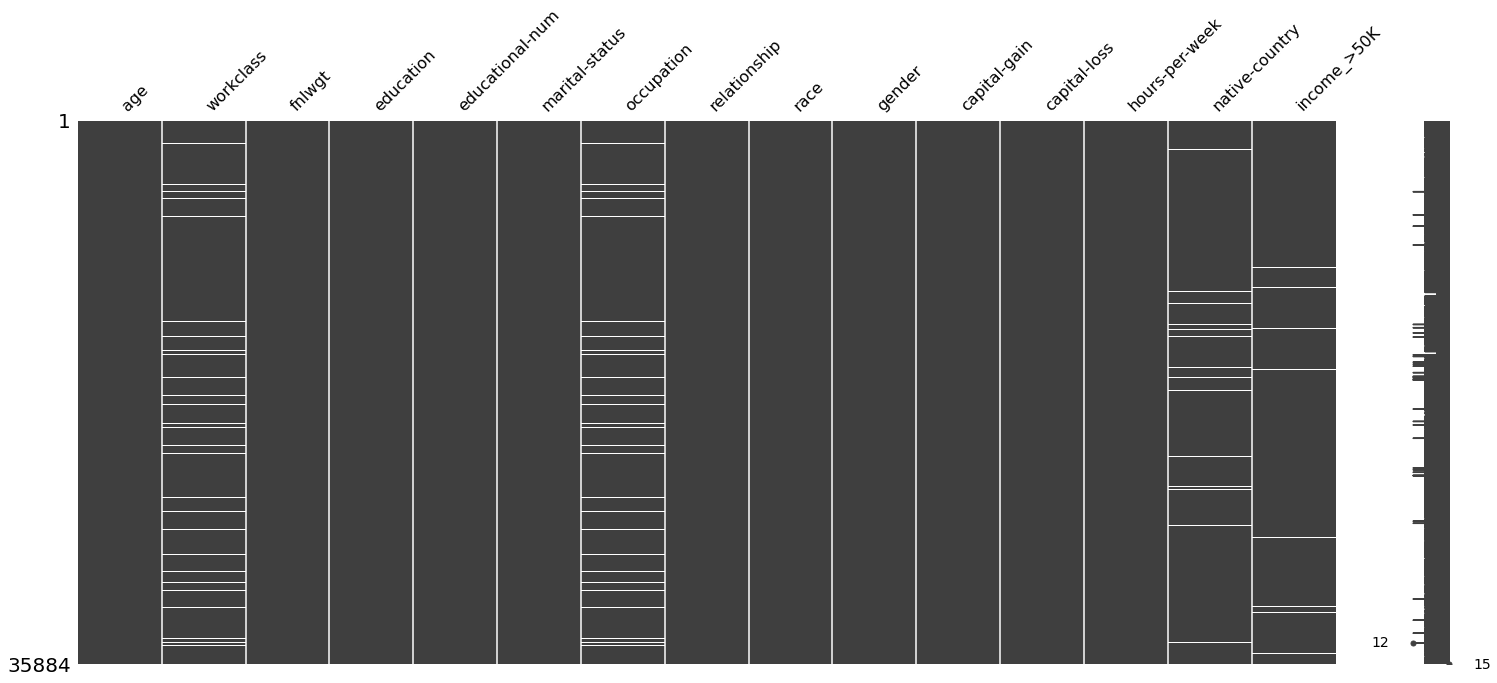

In [15]:
msno.matrix(train_copy)
plt.show()

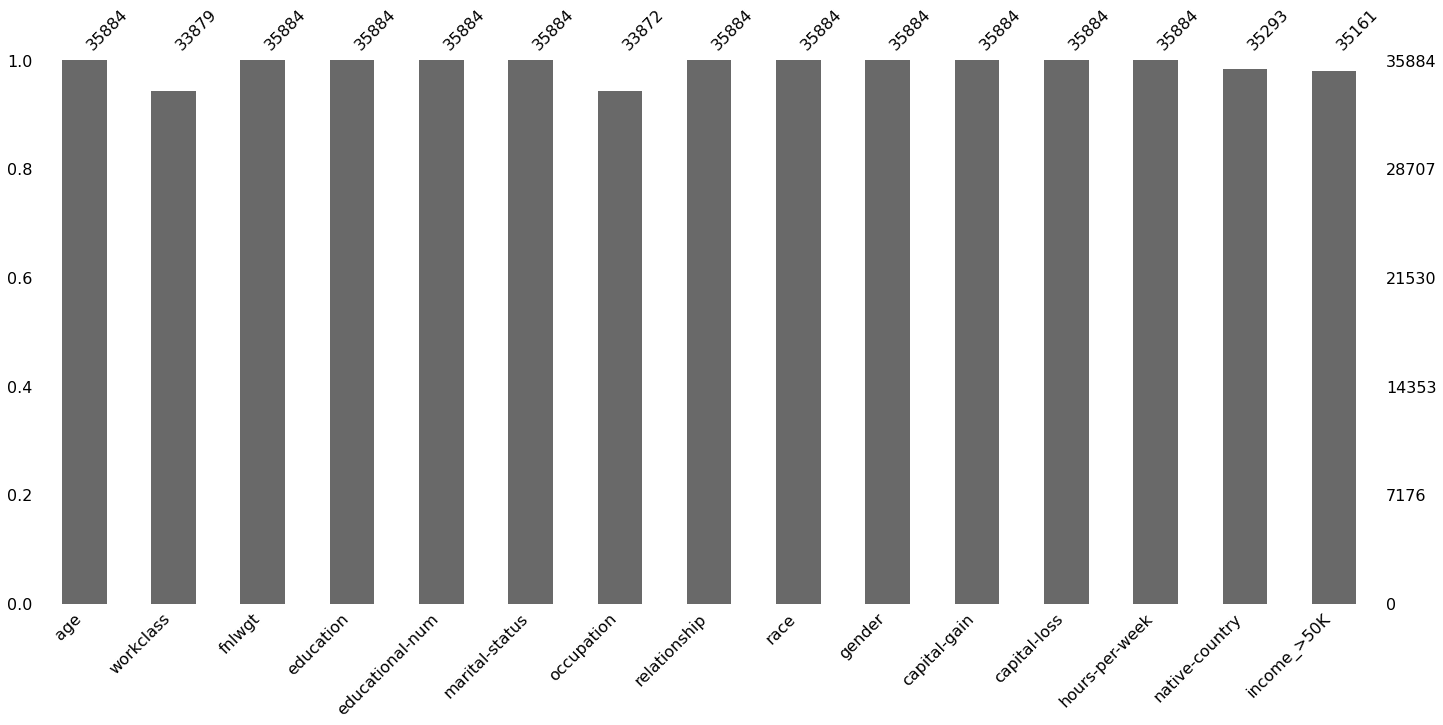

In [16]:
msno.bar(train_copy)
plt.show()

In [17]:
#profile_report = ProfileReport(train_copy, explorative=True, dark_mode=True)

In [18]:
profile_report_file_path = Path('income_class_profile.html')

try:
    profile_report_file_path.resolve(strict=True)
except FileNotFoundError:
    profile_report.to_file("income_class_profile.html")
else:
    pass

## 3.4 Study each attribute and its characteristics:
## - Name
## - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
## - % of missing values
## - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
## - Possibly useful for the task?
## - Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [19]:
#Function that will return the value count and frequency of each observation within a column
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

### 3.4.1 Age

In [20]:
train_copy['age'].head()

0    43
1    33
2    51
3    19
4    35
Name: age, dtype: int64

In [21]:
train_copy['age'].describe()

count    35884.000000
mean        38.628497
std         13.757202
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [22]:
train_copy['age'].dtype

dtype('int64')

In [23]:
train_copy['age'].isnull().sum()

0

In [24]:
age_value_cnt_norm = train_copy['age'].value_counts(normalize=True) * 100

In [25]:
age_value_cnt = train_copy['age'].value_counts()

In [26]:
value_cnt_norm_cal(train_copy, 'age')

Count  Frequency (%)
33   1005       2.800691
35   1000       2.786757
36    992       2.764463
28    969       2.700368
31    967       2.694794
..    ...            ...
88      5       0.013934
85      3       0.008360
87      2       0.005574
89      2       0.005574
86      1       0.002787

[74 rows x 2 columns]

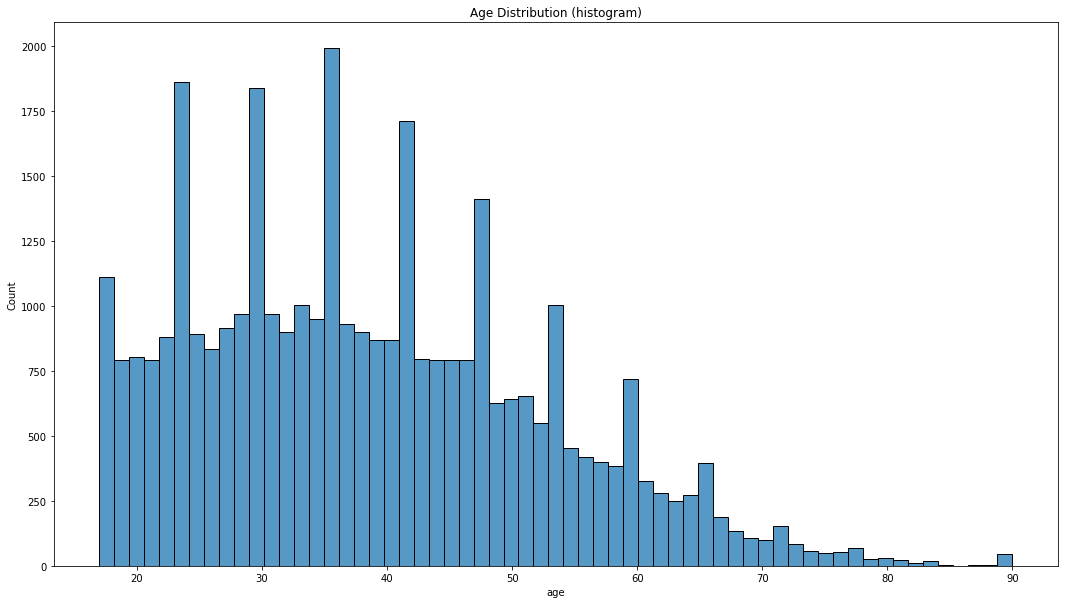

In [27]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['age'])
plt.title('Age Distribution (histogram)')
plt.show()

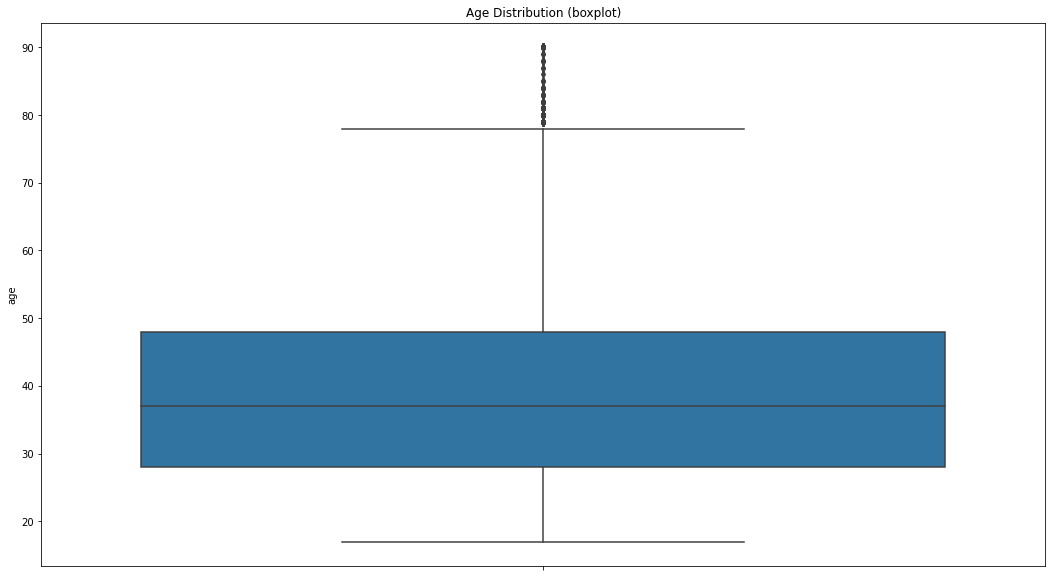

In [28]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(y=train_copy['age'])
plt.title('Age Distribution (boxplot)')
plt.show()

In [29]:
# TODO: Age is might be useful for the model, will keep it for now

### 3.4.2 Workclass

In [30]:
train_copy['workclass'].dtype

dtype('O')

In [31]:
train_copy['workclass'].head()

0           Local-gov
1             Private
2    Self-emp-not-inc
3             Private
4             Private
Name: workclass, dtype: object

In [32]:
value_cnt_norm_cal(train_copy,'workclass')

Count  Frequency (%)
Private           24931      73.588359
Self-emp-not-inc   2818       8.317837
Local-gov          2322       6.853803
State-gov          1470       4.338971
Self-emp-inc       1272       3.754538
Federal-gov        1042       3.075652
Without-pay          17       0.050179
Never-worked          7       0.020662

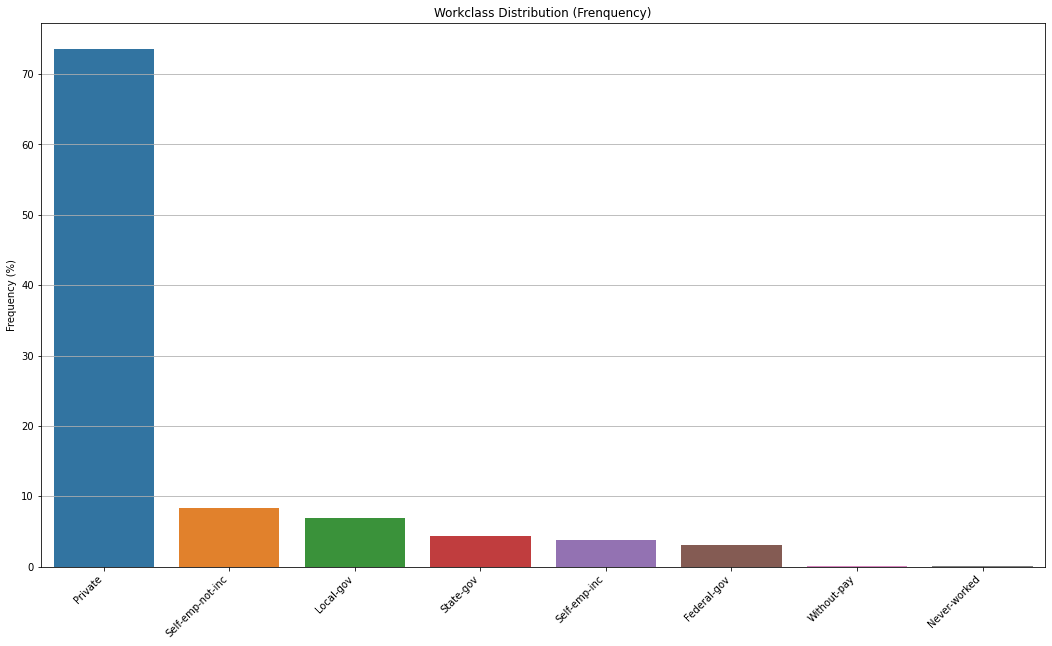

In [33]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'workclass').index, y=value_cnt_norm_cal(train_copy,'workclass')['Frequency (%)'])
plt.title('Workclass Distribution (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

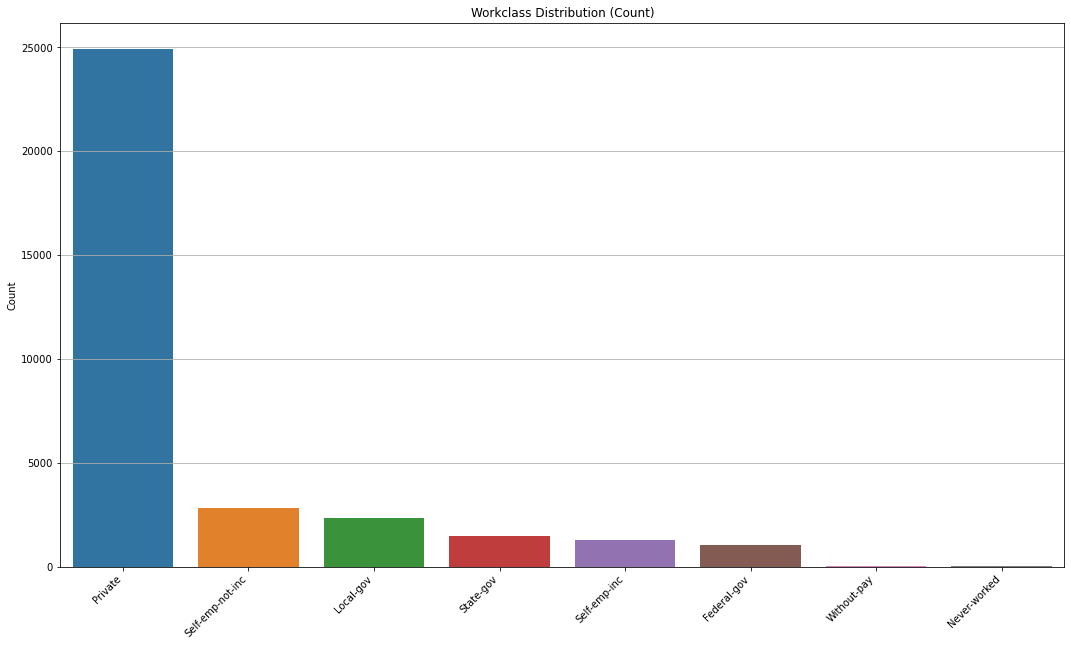

In [34]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'workclass').index, y=value_cnt_norm_cal(train_copy,'workclass')['Count'])
plt.title('Workclass Distribution (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [35]:
train_copy['workclass'].isnull().sum()

2005

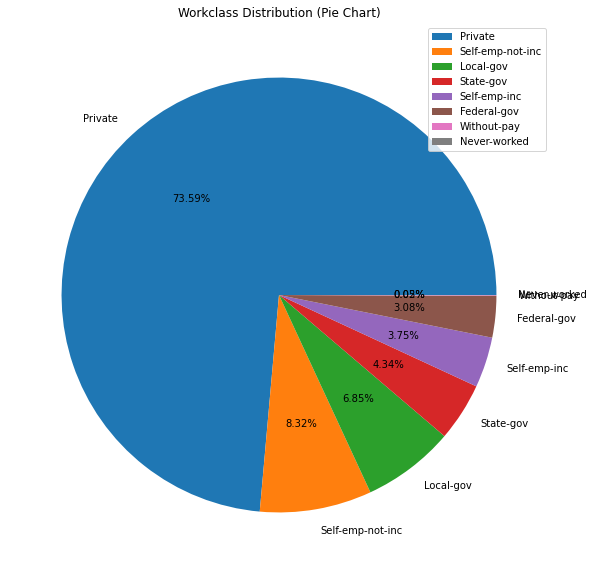

In [36]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['workclass'].value_counts(), labels=train_copy['workclass'].value_counts().index, autopct='%1.2f%%')
plt.title('Workclass Distribution (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [37]:
# TODO: workclass is might be useful for the model, will keep it for now

### 3.4.3 Final weight

Its a weight assigned by the Census Bureau. **The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. **Say sample 7,12 and 33 are having similar fnlwgt values they are more likely to be of the same race, similar educational and social background, etc.. but if you are planning to use it, you should be aware that they are not standardized across different states/country. So someone in one country might share similar fnlwgt with somebody in another country but might have entirely different socio-economic background.

In [38]:
train_copy['fnlwgt'].dtype

dtype('int64')

In [39]:
train_copy['fnlwgt'].head()

0    159449
1     66278
2    134447
3    198668
4    193094
Name: fnlwgt, dtype: int64

In [40]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_copy['fnlwgt'].describe()

count     35884.000
mean     189674.016
std      105290.565
min       13492.000
25%      117385.500
50%      177998.500
75%      237931.750
max     1490400.000
Name: fnlwgt, dtype: float64

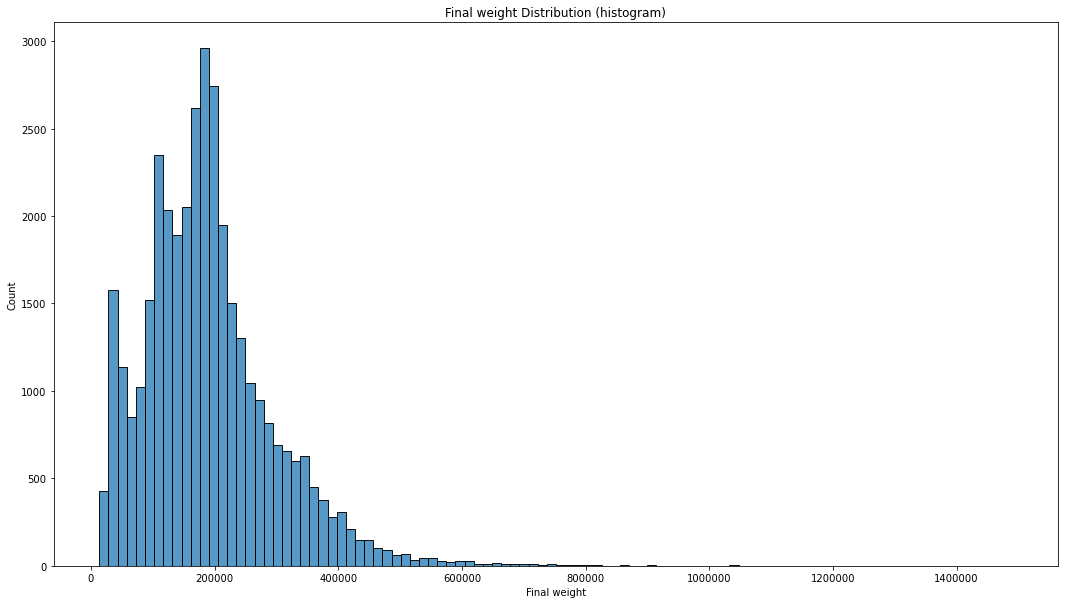

In [41]:
fig, ax = plt.subplots(figsize=(18,10))
ax.ticklabel_format(style='plain')
sns.histplot(train_copy['fnlwgt'],bins=100)
plt.title('Final weight Distribution (histogram)')
plt.xlabel('Final weight')
plt.show()

In [42]:
# TODO: Not sure if this feature is useful, will keep it for now. Will run the feature im and see if this is useful

### 3.4.4. Education

In [43]:
train_copy['education'].dtype

dtype('O')

In [44]:
train_copy['education'].head()

0    Some-college
1         Masters
2         HS-grad
3         HS-grad
4         HS-grad
Name: education, dtype: object

In [45]:
train_copy['education'].isnull().sum()

0

In [46]:
value_cnt_norm_cal(train_copy,'education')

Count  Frequency (%)
HS-grad       11616         32.371
Some-college   8004         22.305
Bachelors      5861         16.333
Masters        1949          5.431
Assoc-voc      1496          4.169
11th           1338          3.729
Assoc-acdm     1213          3.380
10th           1060          2.954
7th-8th         698          1.945
Prof-school     612          1.705
9th             537          1.496
12th            447          1.246
Doctorate       443          1.235
5th-6th         373          1.039
1st-4th         181          0.504
Preschool        56          0.156

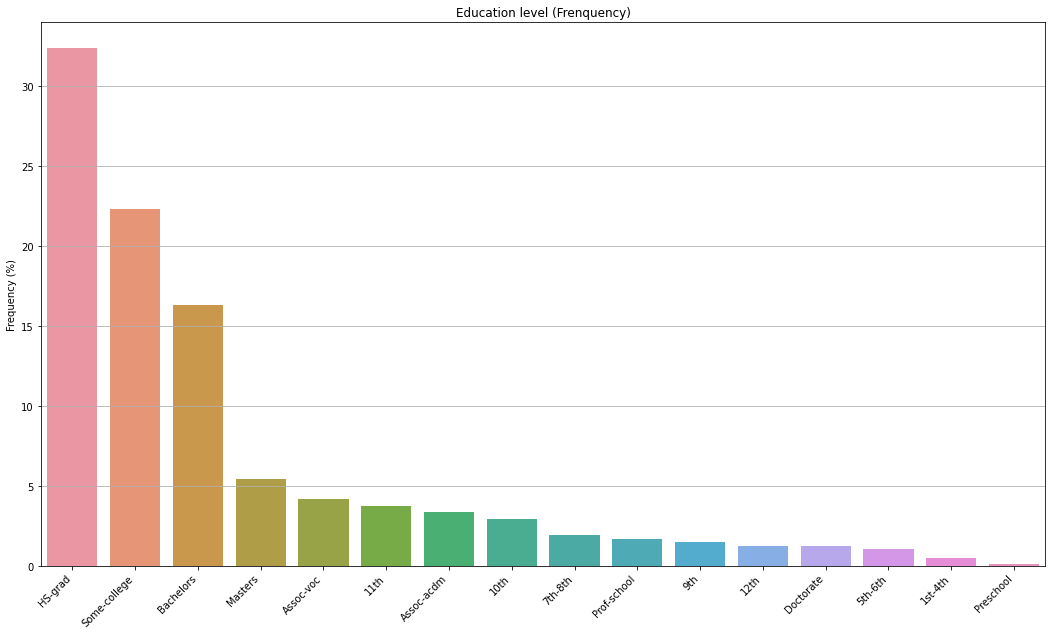

In [47]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'education').index, y=value_cnt_norm_cal(train_copy,'education')['Frequency (%)'])
plt.title('Education level (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

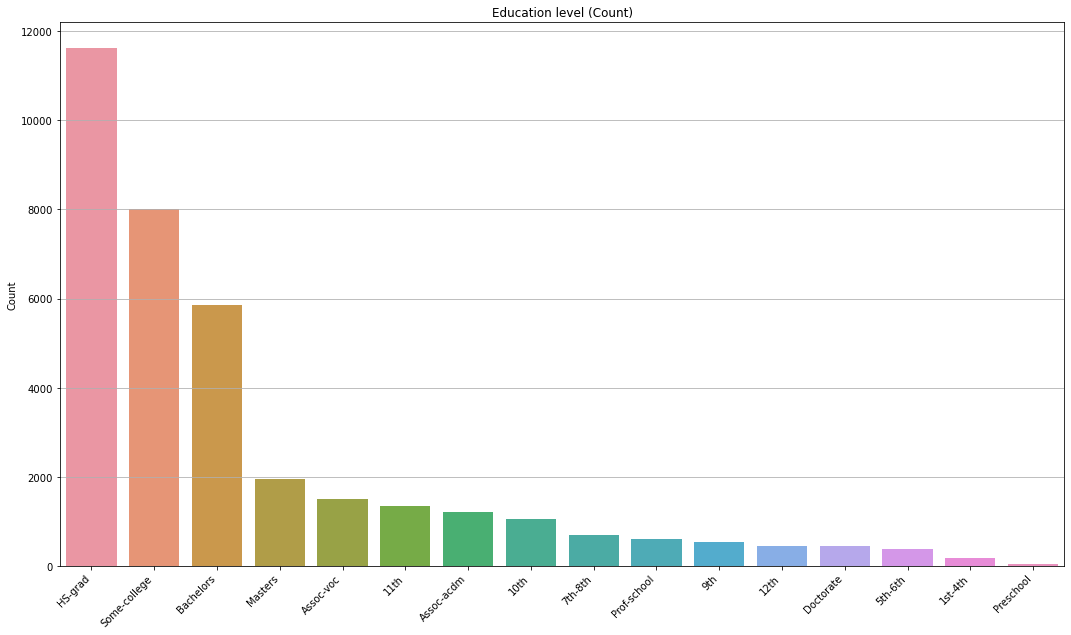

In [48]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'education').index, y=value_cnt_norm_cal(train_copy,'education')['Count'])
plt.title('Education level (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [49]:
# TODO: education level is might be useful for the model, will keep it for now

### 3.4.5 education number

In [50]:
train_copy['educational-num'].dtype

dtype('int64')

In [51]:
train_copy['educational-num'].head()

0    10
1    14
2     9
3     9
4     9
Name: educational-num, dtype: int64

In [52]:
train_copy['educational-num'].value_counts()

9     11616
10     8004
13     5861
14     1949
11     1496
7      1338
12     1213
6      1060
4       698
15      612
5       537
8       447
16      443
3       373
2       181
1        56
Name: educational-num, dtype: int64

In [53]:
train_copy[['education','educational-num']].nunique()

education          16
educational-num    16
dtype: int64

In [54]:
train_copy[['education','educational-num']].value_counts()

education     educational-num
HS-grad       9                  11616
Some-college  10                  8004
Bachelors     13                  5861
Masters       14                  1949
Assoc-voc     11                  1496
11th          7                   1338
Assoc-acdm    12                  1213
10th          6                   1060
7th-8th       4                    698
Prof-school   15                   612
9th           5                    537
12th          8                    447
Doctorate     16                   443
5th-6th       3                    373
1st-4th       2                    181
Preschool     1                     56
dtype: int64

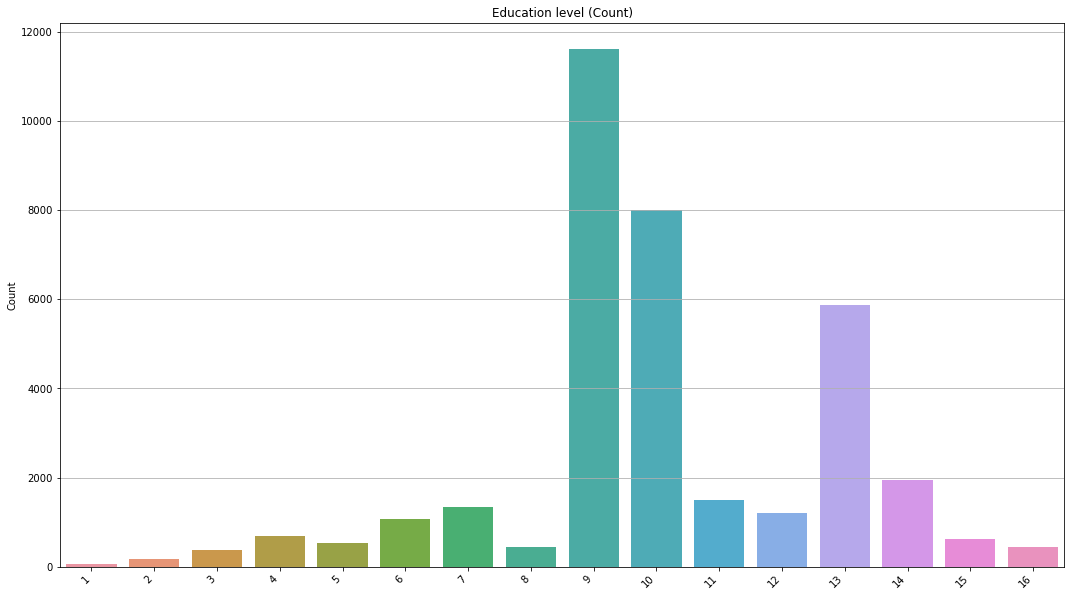

In [55]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'educational-num').index, y=value_cnt_norm_cal(train_copy,'educational-num')['Count'])
plt.title('Education level (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [56]:
# TODO: since education-num is essentially an encoded version of education, will need to drop this feature and keep education for now.

### 3.4.6 Marital Status

In [57]:
train_copy['marital-status'].dtype

dtype('O')

In [58]:
train_copy['marital-status'].head()

0    Married-civ-spouse
1         Never-married
2    Married-civ-spouse
3         Never-married
4         Never-married
Name: marital-status, dtype: object

In [59]:
train_copy['marital-status'].isnull().sum()

0

In [60]:
value_cnt_norm_cal(train_copy,'marital-status')

Count  Frequency (%)
Married-civ-spouse     16478         45.920
Never-married          11850         33.023
Divorced                4872         13.577
Separated               1108          3.088
Widowed                 1098          3.060
Married-spouse-absent    452          1.260
Married-AF-spouse         26          0.072

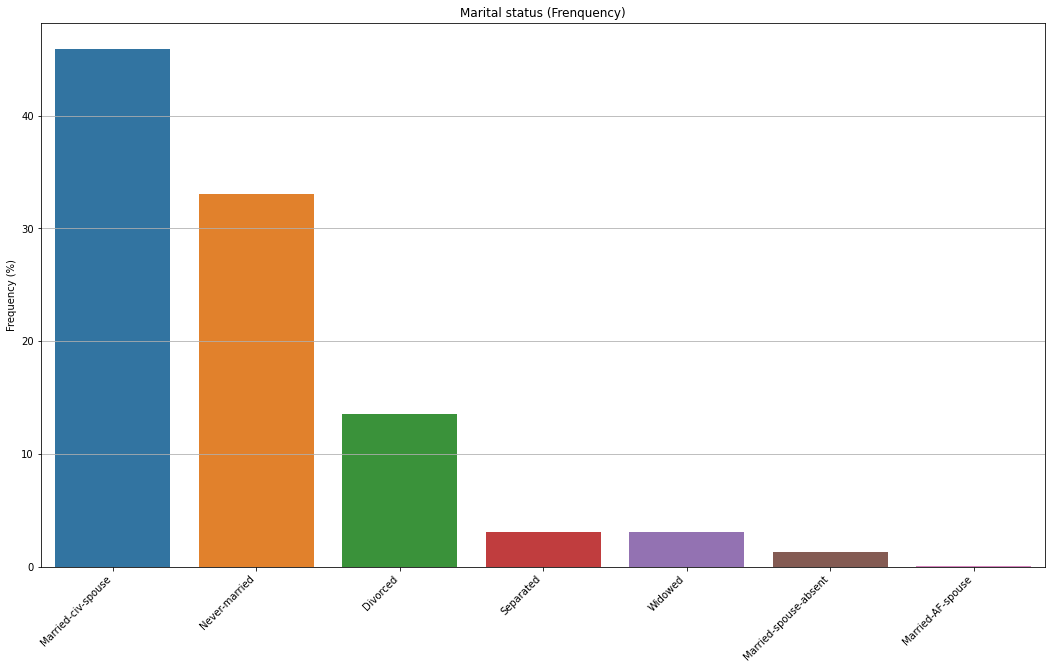

In [61]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'marital-status').index, y=value_cnt_norm_cal(train_copy,'marital-status')['Frequency (%)'])
plt.title('Marital status (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

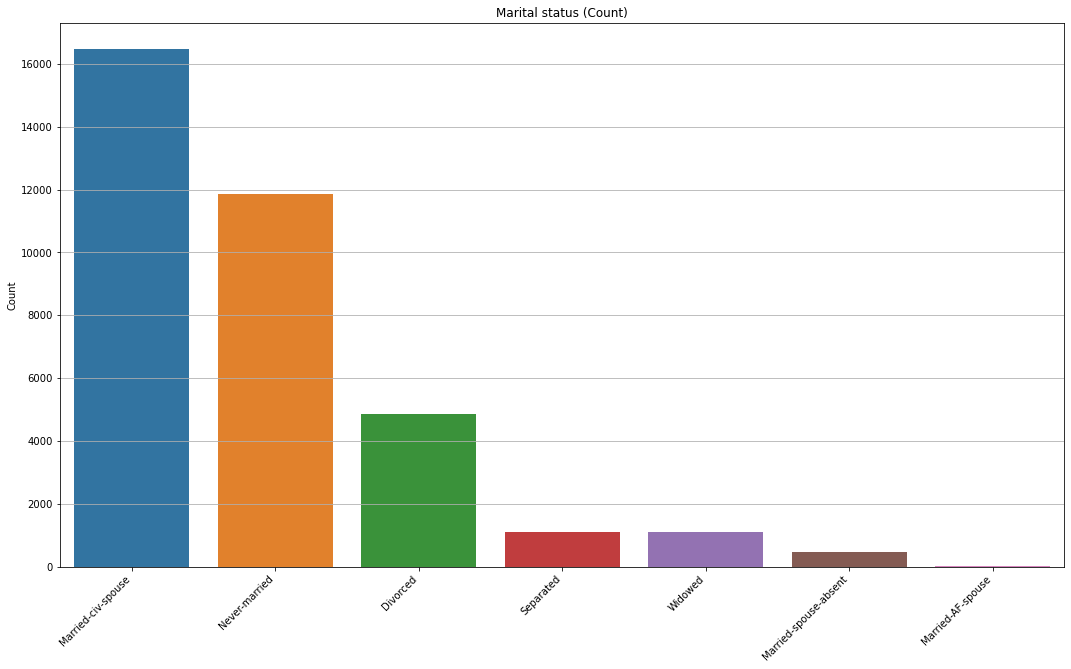

In [62]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'marital-status').index, y=value_cnt_norm_cal(train_copy,'marital-status')['Count'])
plt.title('Marital status (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

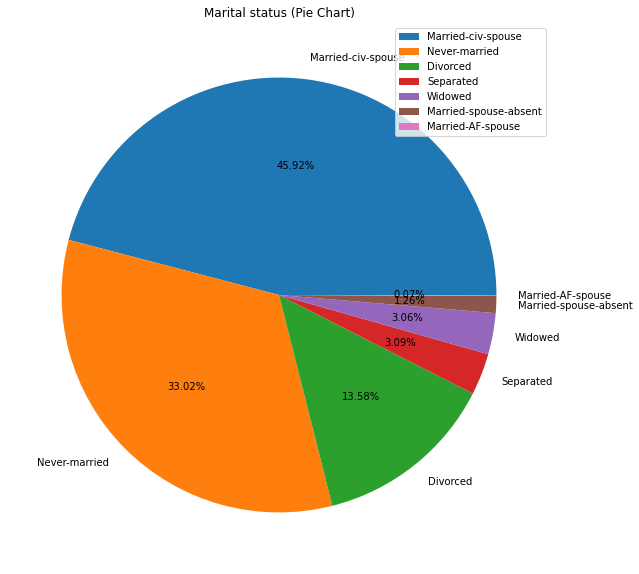

In [63]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['marital-status'].value_counts(), labels=train_copy['marital-status'].value_counts().index, autopct='%1.2f%%')
plt.title('Marital status (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

### 3.4.7 Occupation

In [64]:
train_copy['occupation'].dtype

dtype('O')

In [65]:
train_copy['occupation'].head()

0      Protective-serv
1       Prof-specialty
2         Craft-repair
3    Handlers-cleaners
4         Craft-repair
Name: occupation, dtype: object

In [66]:
train_copy['occupation'].isnull().sum()

2012

In [67]:
train_copy['occupation'].value_counts()

Craft-repair         4540
Prof-specialty       4508
Exec-managerial      4471
Adm-clerical         4111
Sales                4070
Other-service        3631
Machine-op-inspct    2215
Transport-moving     1713
Handlers-cleaners    1511
Farming-fishing      1093
Tech-support         1091
Protective-serv       712
Priv-house-serv       197
Armed-Forces            9
Name: occupation, dtype: int64

In [68]:
train_copy['occupation'].nunique()

14

In [69]:
value_cnt_norm_cal(train_copy,'occupation')

Count  Frequency (%)
Craft-repair        4540         13.403
Prof-specialty      4508         13.309
Exec-managerial     4471         13.200
Adm-clerical        4111         12.137
Sales               4070         12.016
Other-service       3631         10.720
Machine-op-inspct   2215          6.539
Transport-moving    1713          5.057
Handlers-cleaners   1511          4.461
Farming-fishing     1093          3.227
Tech-support        1091          3.221
Protective-serv      712          2.102
Priv-house-serv      197          0.582
Armed-Forces           9          0.027

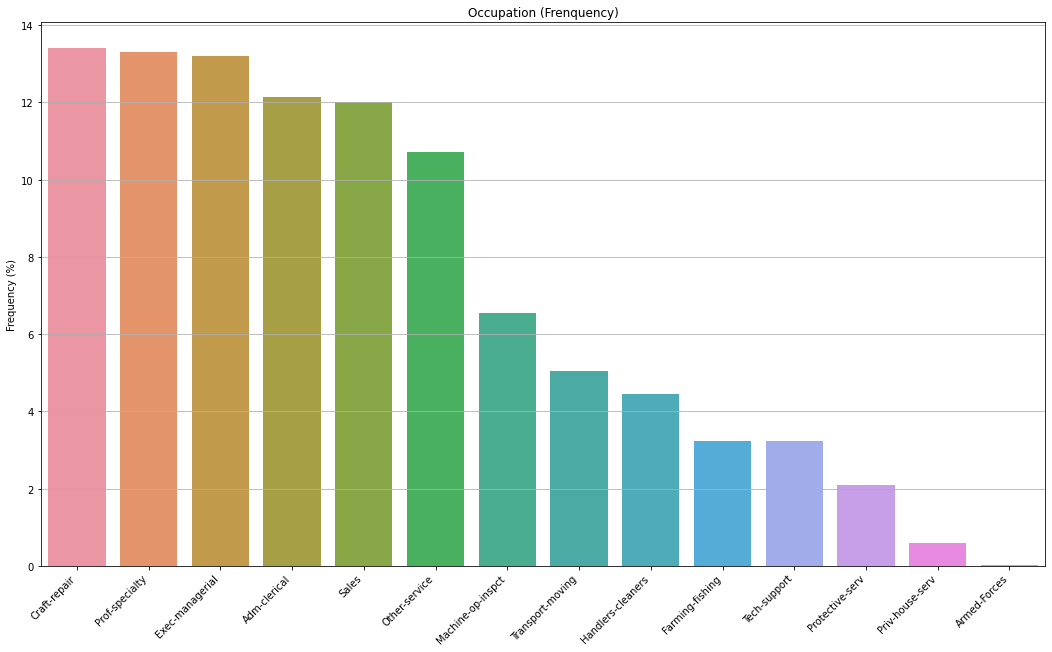

In [70]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'occupation').index, y=value_cnt_norm_cal(train_copy,'occupation')['Frequency (%)'])
plt.title('Occupation (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

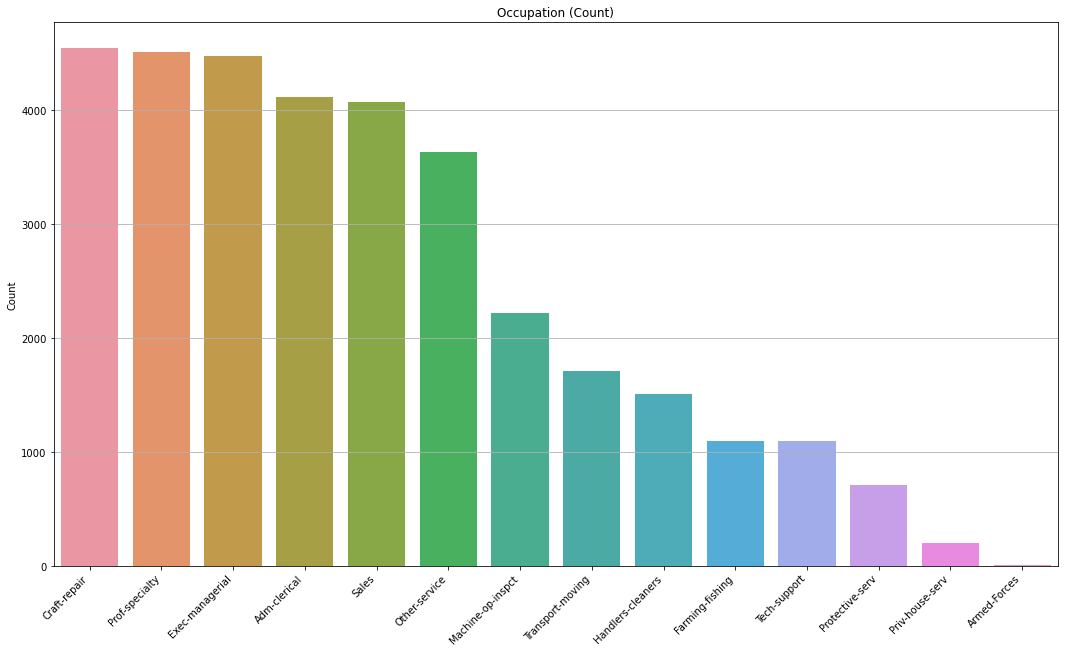

In [71]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'occupation').index, y=value_cnt_norm_cal(train_copy,'occupation')['Count'])
plt.title('Occupation (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [72]:
## TODO: occupation is highly correlated with workclass, has almost the same missing value like workclass and gives less info than workclass. we might need to drop this feature.

### 3.4.8 relationship

In [73]:
train_copy['relationship'].dtype

dtype('O')

In [74]:
train_copy['relationship'].head()

0          Husband
1    Not-in-family
2          Husband
3        Own-child
4        Own-child
Name: relationship, dtype: object

In [75]:
train_copy['relationship'].value_counts()

Husband           14512
Not-in-family      9187
Own-child          5622
Unmarried          3739
Wife               1710
Other-relative     1114
Name: relationship, dtype: int64

In [76]:
train_copy['relationship'].isnull().sum()

0

In [77]:
value_cnt_norm_cal(train_copy,'relationship')

Count  Frequency (%)
Husband         14512         40.441
Not-in-family    9187         25.602
Own-child        5622         15.667
Unmarried        3739         10.420
Wife             1710          4.765
Other-relative   1114          3.104

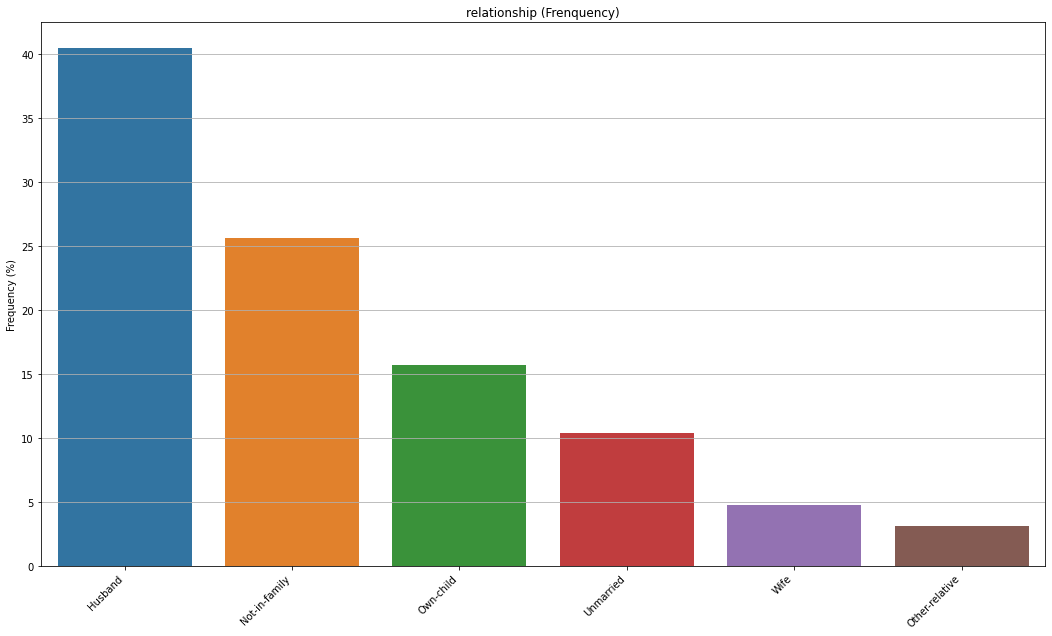

In [78]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'relationship').index, y=value_cnt_norm_cal(train_copy,'relationship')['Frequency (%)'])
plt.title('relationship (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

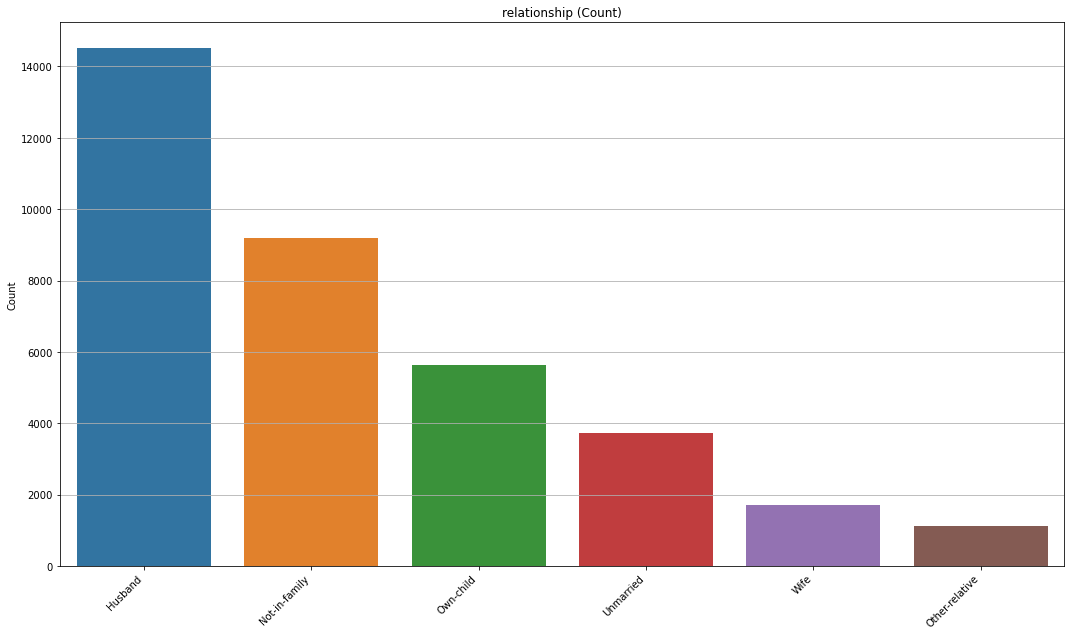

In [79]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'relationship').index, y=value_cnt_norm_cal(train_copy,'relationship')['Count'])
plt.title('relationship (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

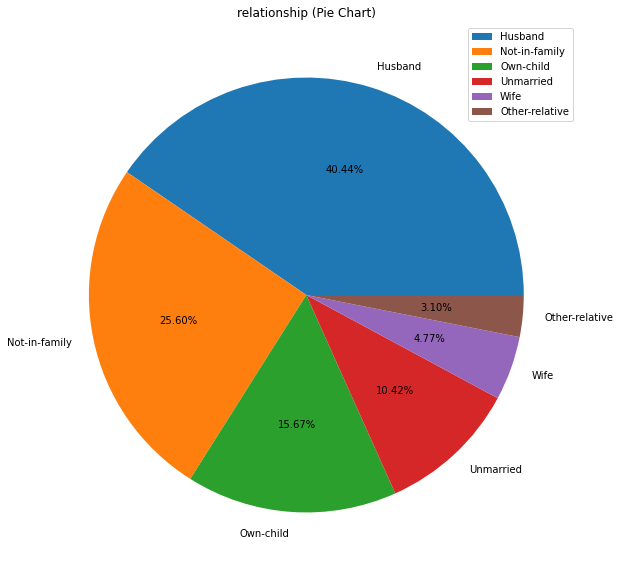

In [80]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['relationship'].value_counts(), labels=train_copy['relationship'].value_counts().index, autopct='%1.2f%%')
plt.title('relationship (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [81]:
# TODO: relationship is highly correlated with Marital status. we might need to drop this feature.

### 3.4.9 Race

In [82]:
train_copy['race'].dtype

dtype('O')

In [83]:
train_copy['race'].isnull().sum()

0

In [84]:
train_copy['race'].head()

0    White
1    White
2    White
3    White
4    White
Name: race, dtype: object

In [85]:
value_cnt_norm_cal(train_copy,'race')

Count  Frequency (%)
White               30686         85.514
Black                3436          9.575
Asian-Pac-Islander   1104          3.077
Amer-Indian-Eskimo    351          0.978
Other                 307          0.856

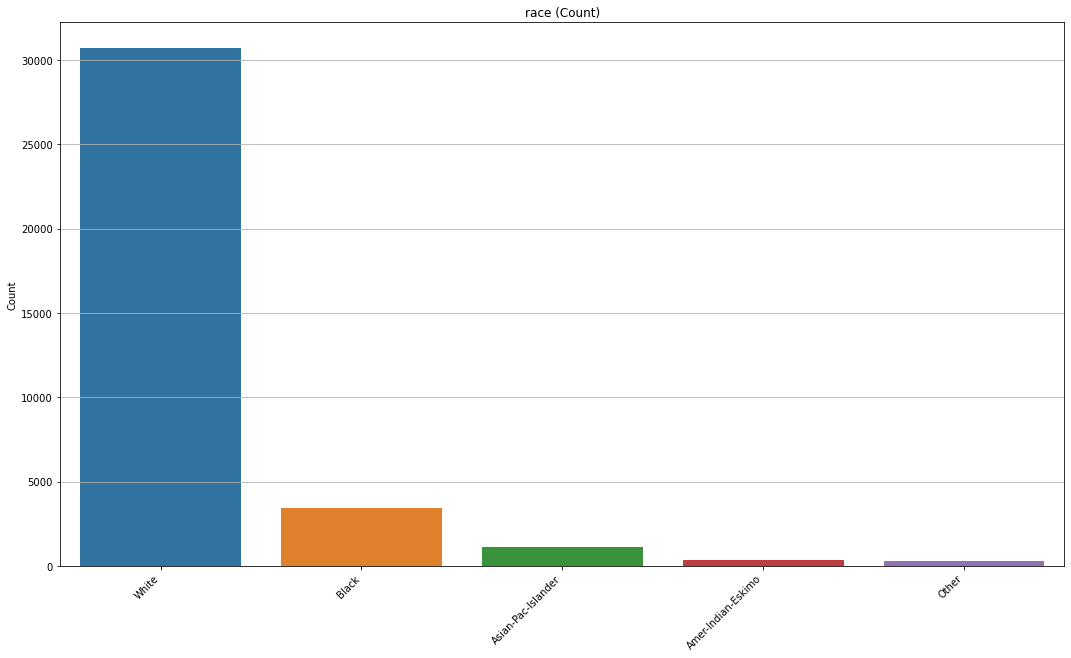

In [86]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'race').index, y=value_cnt_norm_cal(train_copy,'race')['Count'])
plt.title('race (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

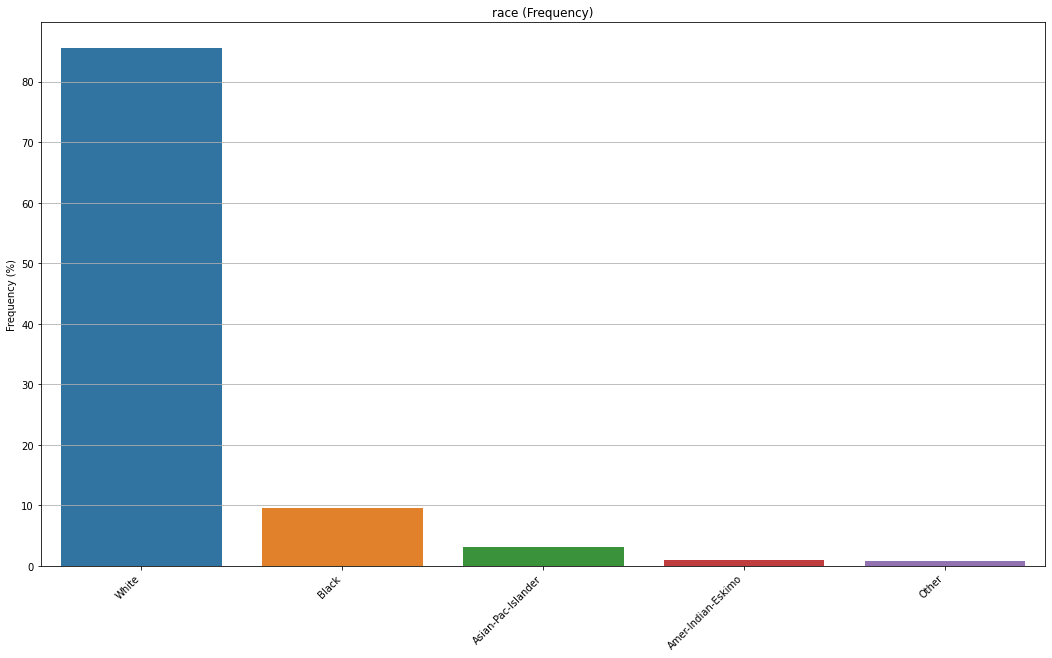

In [87]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'race').index, y=value_cnt_norm_cal(train_copy,'race')['Frequency (%)'])
plt.title('race (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

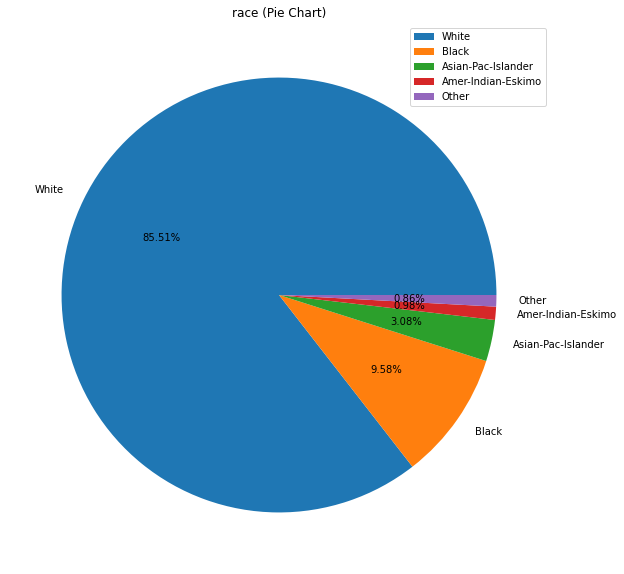

In [88]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['race'].value_counts(), labels=train_copy['race'].value_counts().index, autopct='%1.2f%%')
plt.title('race (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [89]:
# TODO: Race might influence on the salary. will keep it

### 3.4.10 Gender

In [90]:
train_copy['gender'].dtype

dtype('O')

In [91]:
train_copy['race'].isnull().sum()

0

In [92]:
value_cnt_norm_cal(train_copy,'gender')

Count  Frequency (%)
Male    23997         66.874
Female  11887         33.126

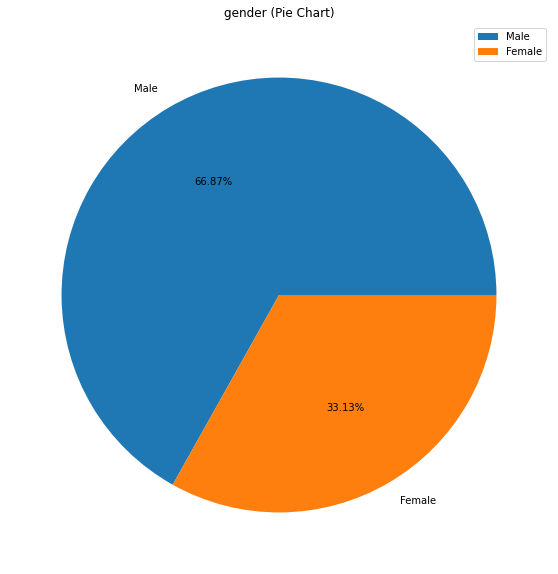

In [93]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['gender'].value_counts(), labels=train_copy['gender'].value_counts().index, autopct='%1.2f%%')
plt.title('gender (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

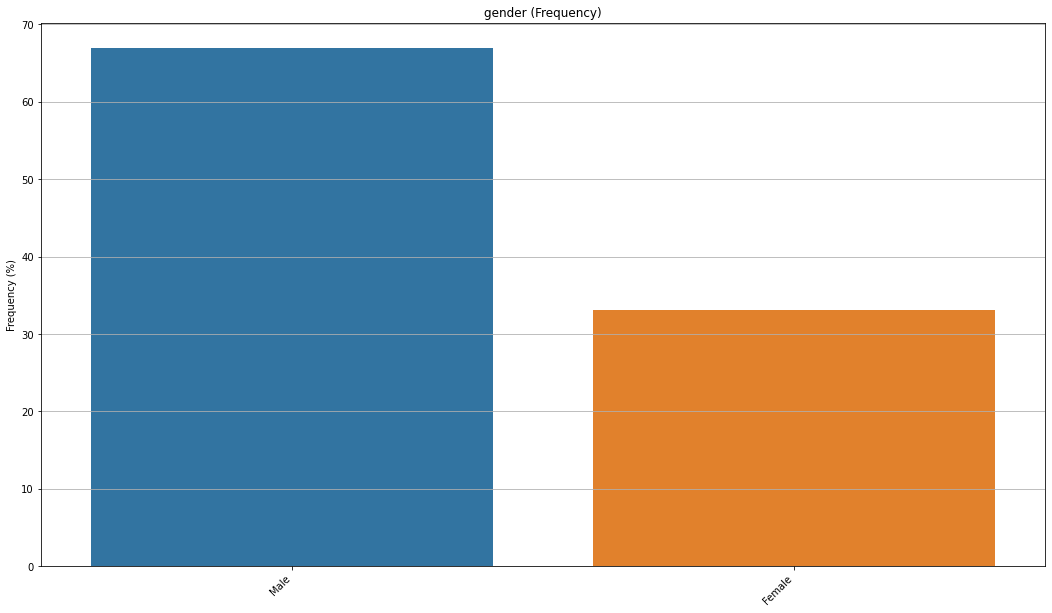

In [94]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'gender').index, y=value_cnt_norm_cal(train_copy,'gender')['Frequency (%)'])
plt.title('gender (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

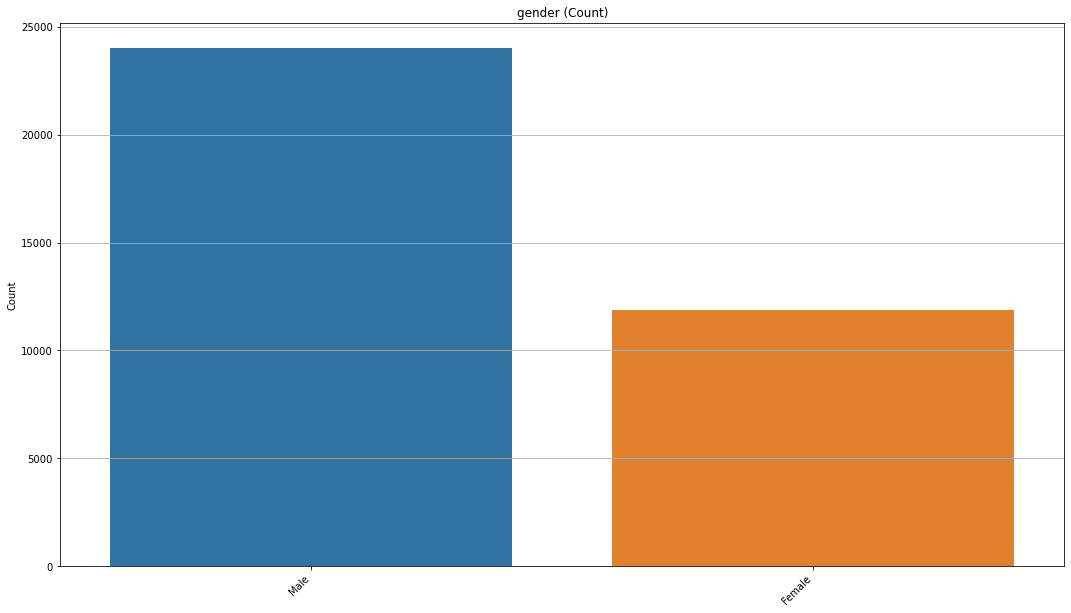

In [95]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'gender').index, y=value_cnt_norm_cal(train_copy,'gender')['Count'])
plt.title('gender (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [96]:
# TODO: Gender might influence on the salary. will keep it

### 3.4.11 capital gain

In [97]:
train_copy['capital-gain'].dtype

dtype('int64')

In [98]:
train_copy['capital-gain'].describe()

count   35884.000
mean     1094.216
std      7570.470
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital-gain, dtype: float64

In [99]:
train_copy['capital-gain'].isnull().sum()

0

In [100]:
train_copy['capital-gain'].value_counts()

0        32938
15024      363
7688       301
7298       263
99999      186
         ...  
1264         1
2009         1
7262         1
5060         1
1639         1
Name: capital-gain, Length: 122, dtype: int64

In [101]:
train_copy['capital-gain'].shape

(35884,)

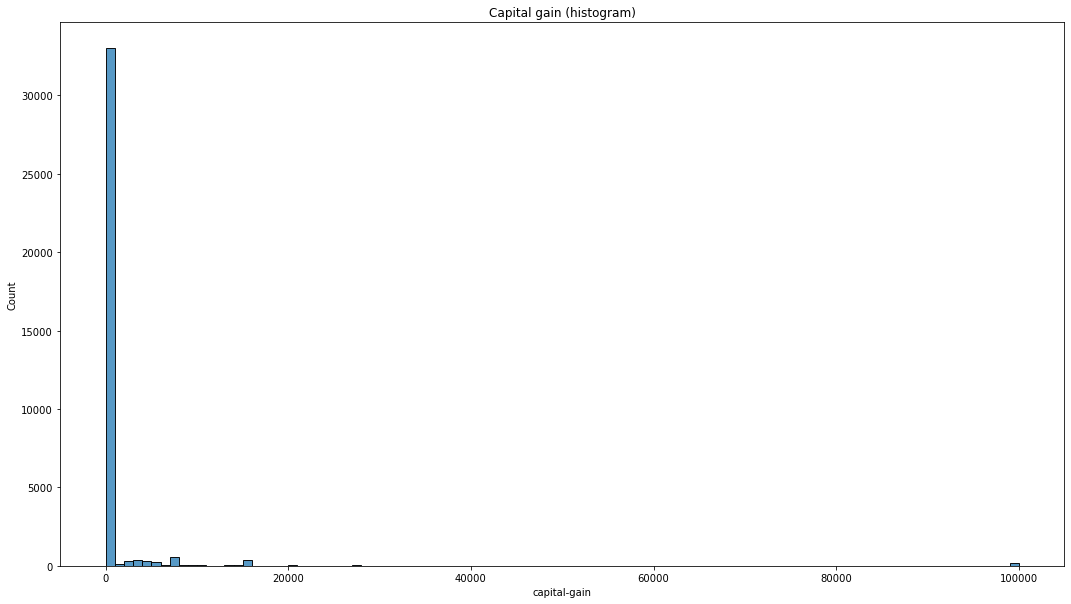

In [102]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['capital-gain'],bins=100)
plt.title('Capital gain (histogram)')
plt.show()

In [103]:
# TODO: Capital gain is very skewed and contains a lot of zeros. we might need to drop this feature.

### 3.4.12 capital loss

In [104]:
train_copy['capital-loss'].dtype

dtype('int64')

In [105]:
train_copy['capital-loss'].describe()

count   35884.000
mean       88.348
std       404.658
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital-loss, dtype: float64

In [106]:
train_copy['capital-loss'].isnull().sum()

0

In [107]:
train_copy['capital-loss'].value_counts()

0       34191
1902      241
1977      175
1887      170
1485       55
        ...  
1429        1
2465        1
1539        1
2080        1
155         1
Name: capital-loss, Length: 98, dtype: int64

In [108]:
train_copy['capital-loss'].shape

(35884,)

In [109]:
value_cnt_norm_cal(train_copy,'capital-loss')

Count  Frequency (%)
0     34191         95.282
1902    241          0.672
1977    175          0.488
1887    170          0.474
1485     55          0.153
...     ...            ...
1429      1          0.003
2465      1          0.003
1539      1          0.003
2080      1          0.003
155       1          0.003

[98 rows x 2 columns]

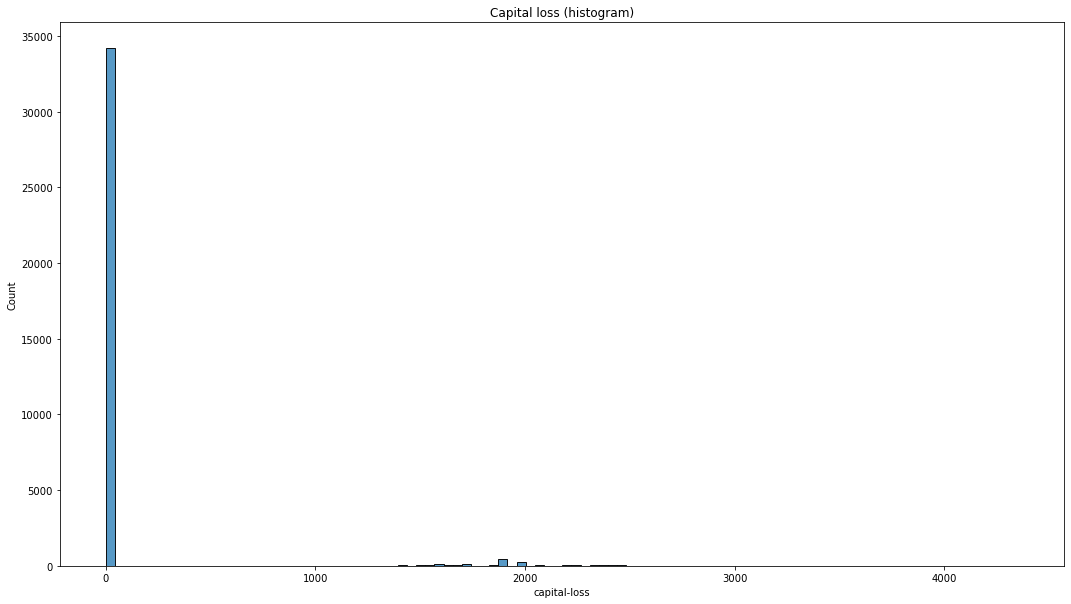

In [110]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['capital-loss'],bins=100)
plt.title('Capital loss (histogram)')
plt.show()

In [111]:
# TODO: Capital loss is very skewed and contains a lot of zeros. we might need to drop this feature.

### 3.4.13 Hours per week

In [112]:
train_copy['hours-per-week'].dtype

dtype('int64')

In [113]:
train_copy['hours-per-week'].describe()

count   35884.000
mean       40.411
std        12.430
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours-per-week, dtype: float64

In [114]:
value_cnt_norm_cal(train_copy,'hours-per-week')

Count  Frequency (%)
40  16703         46.547
50   3127          8.714
45   2000          5.574
60   1603          4.467
35   1437          4.005
..    ...            ...
86      2          0.006
89      2          0.006
87      1          0.003
97      1          0.003
82      1          0.003

[93 rows x 2 columns]

In [115]:
train_copy['hours-per-week'].isnull().sum()

0

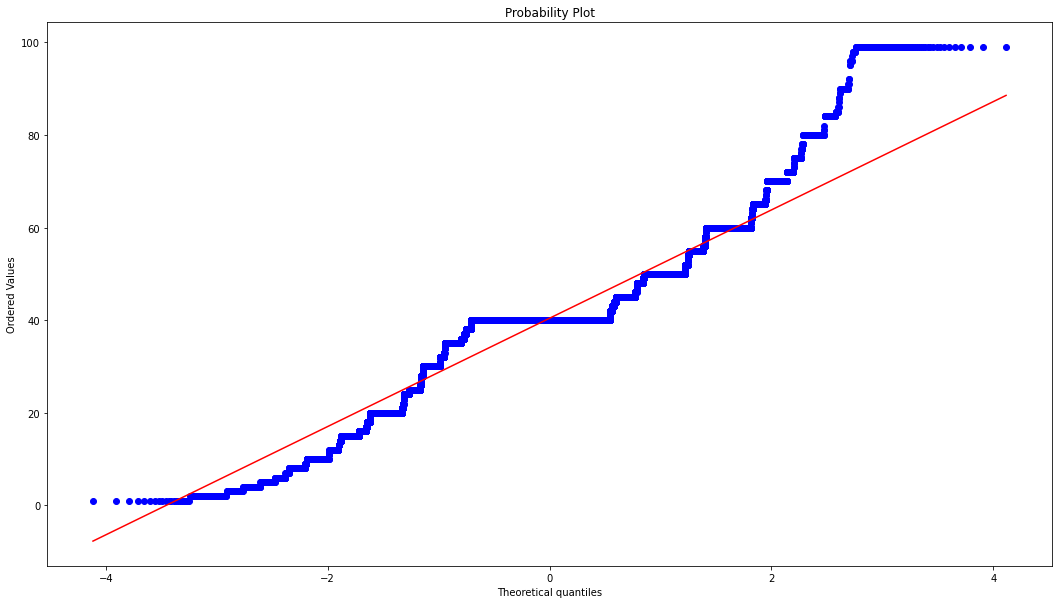

In [116]:
#checking if hours-per-week is normally distributed
fig, ax = plt.subplots(figsize=(18,10))
probplot(train_copy['hours-per-week'], dist="norm", plot=ax)
plt.show()

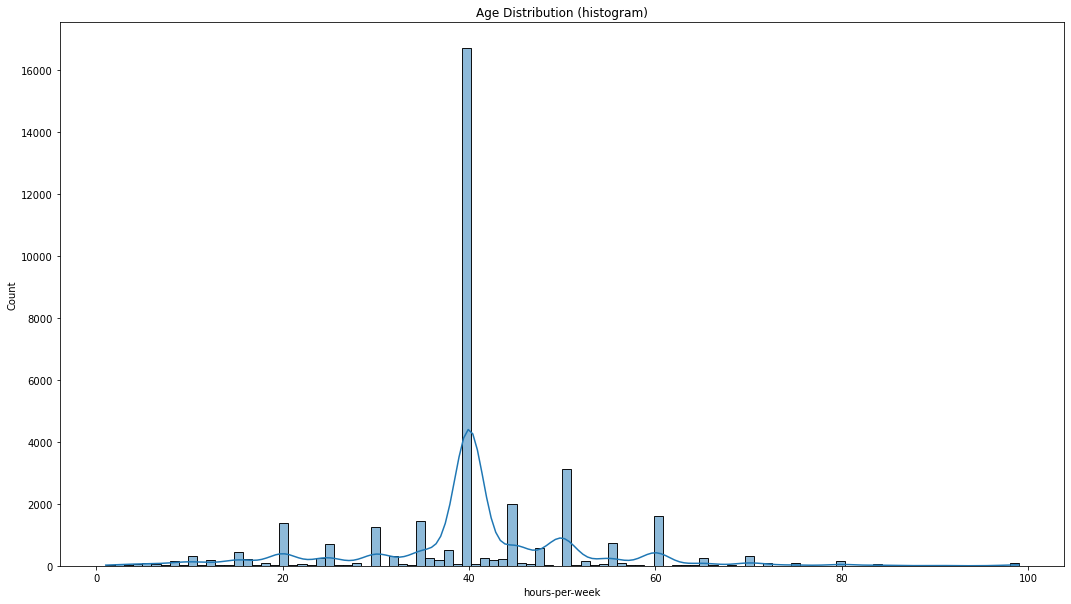

In [117]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['hours-per-week'],bins=100,kde=True)
plt.title('Age Distribution (histogram)')
plt.show()

In [118]:
# TODO: Hours per week might be useful. will keep it

### 3.4.14 Native country

In [119]:
train_copy['native-country'].dtype

dtype('O')

In [120]:
train_copy['native-country'].isnull().sum()

591

In [121]:
value_cnt_norm_cal(train_copy,'native-country')

Count  Frequency (%)
United-States               32284         91.474
Mexico                        706          2.000
Philippines                   217          0.615
Germany                       149          0.422
Puerto-Rico                   133          0.377
Canada                        126          0.357
El-Salvador                   107          0.303
India                         104          0.295
England                       100          0.283
Cuba                           98          0.278
China                          92          0.261
South korea                    88          0.249
Jamaica                        80          0.227
Dominican-Republic             77          0.218
Italy                          73          0.207
Guatemala                      67          0.190
Japan                          63          0.179
Poland                         61          0.173
Vietnam                        61          0.173
Columbia                       56          0.159
Portugal                       53          0.150
Taiwan                         53          0.150
Haiti                          52          0.147
Nicaragua                      41          0.116
Iran                           40          0.113
Greece                         38          0.108
Peru                           32          0.091
Ecuador                        31          0.088
Ireland                        25          0.071
France                         25          0.071
Hong-Kong                      23          0.065
Thailand                       22          0.062
Honduras                       19          0.054
Laos                           17          0.048
Hungary                        16          0.045
Outlying-US(Guam-USVI-etc)     16          0.045
Trinadad&Tobago                16          0.045
Yugoslavia                     16          0.045
Cambodia                       15          0.043
Netherlands                     1          0.003

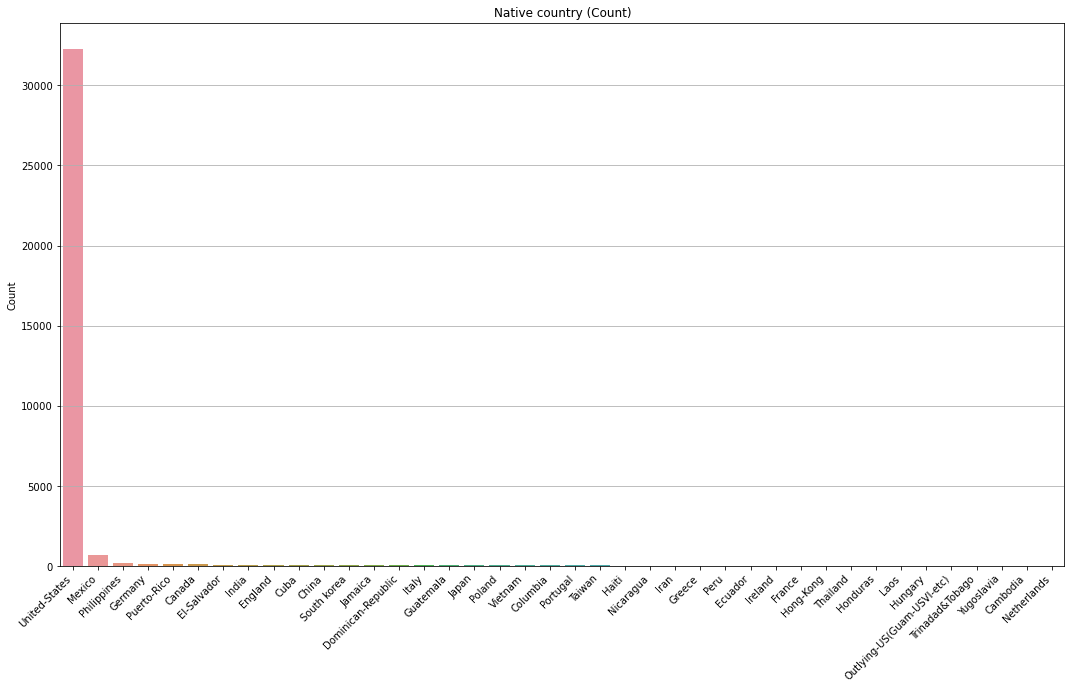

In [122]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'native-country').index, y=value_cnt_norm_cal(train_copy,'native-country')['Count'])
plt.title('Native country (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

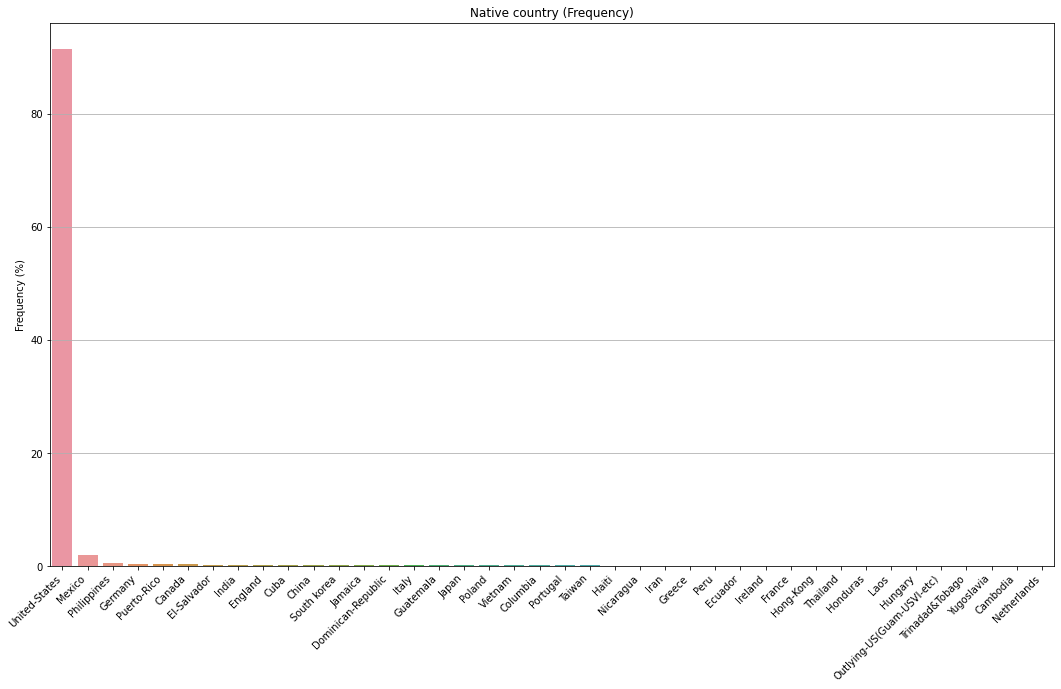

In [123]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'native-country').index, y=value_cnt_norm_cal(train_copy,'native-country')['Frequency (%)'])
plt.title('Native country (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [124]:
# TODO: Native country might be useful but most of the datapoint represent United States. we might need to ingore the other countries.

### 3.4.15 Income > 50 K

In [125]:
train_copy['income_>50K'].dtype

dtype('float64')

In [126]:
train_copy['income_>50K'].isnull().sum()

723

In [127]:
value_cnt_norm_cal(train_copy,'income_>50K')

Count  Frequency (%)
0.000  26683         75.888
1.000   8478         24.112

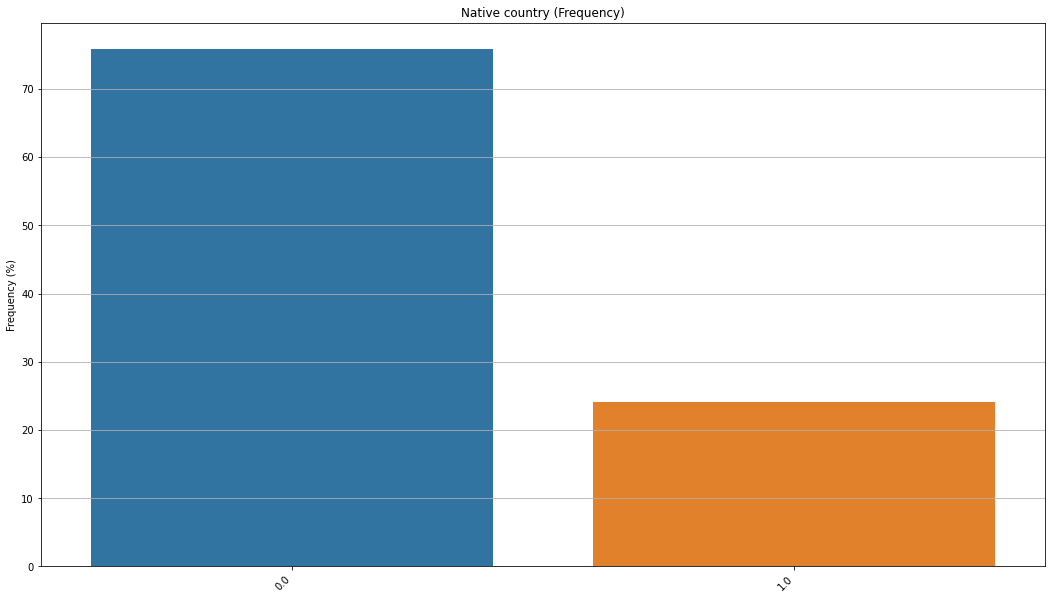

In [128]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'income_>50K').index, y=value_cnt_norm_cal(train_copy,'income_>50K')['Frequency (%)'])
plt.title('Native country (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()


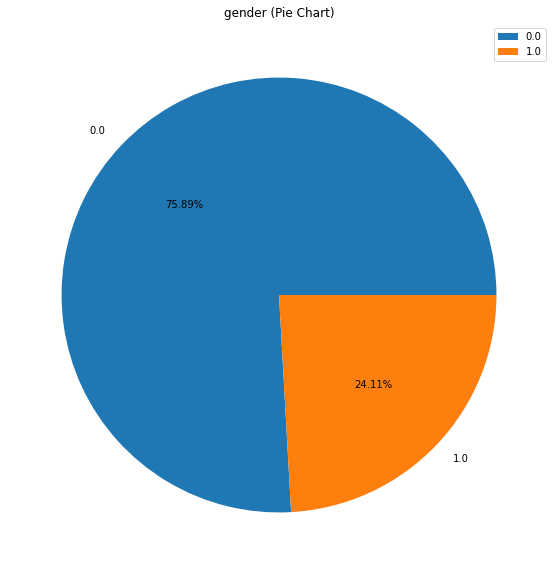

In [129]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['income_>50K'].value_counts(), labels=train_copy['income_>50K'].value_counts().index, autopct='%1.2f%%')
plt.title('gender (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [130]:
# TODO: Our target is imbalance, we will need to oversample before training the model

## 3.5 For supervised learning tasks, identify the target attribute(s).

Tager attribute is the income > 50K

## 3.6 Visualize the data.

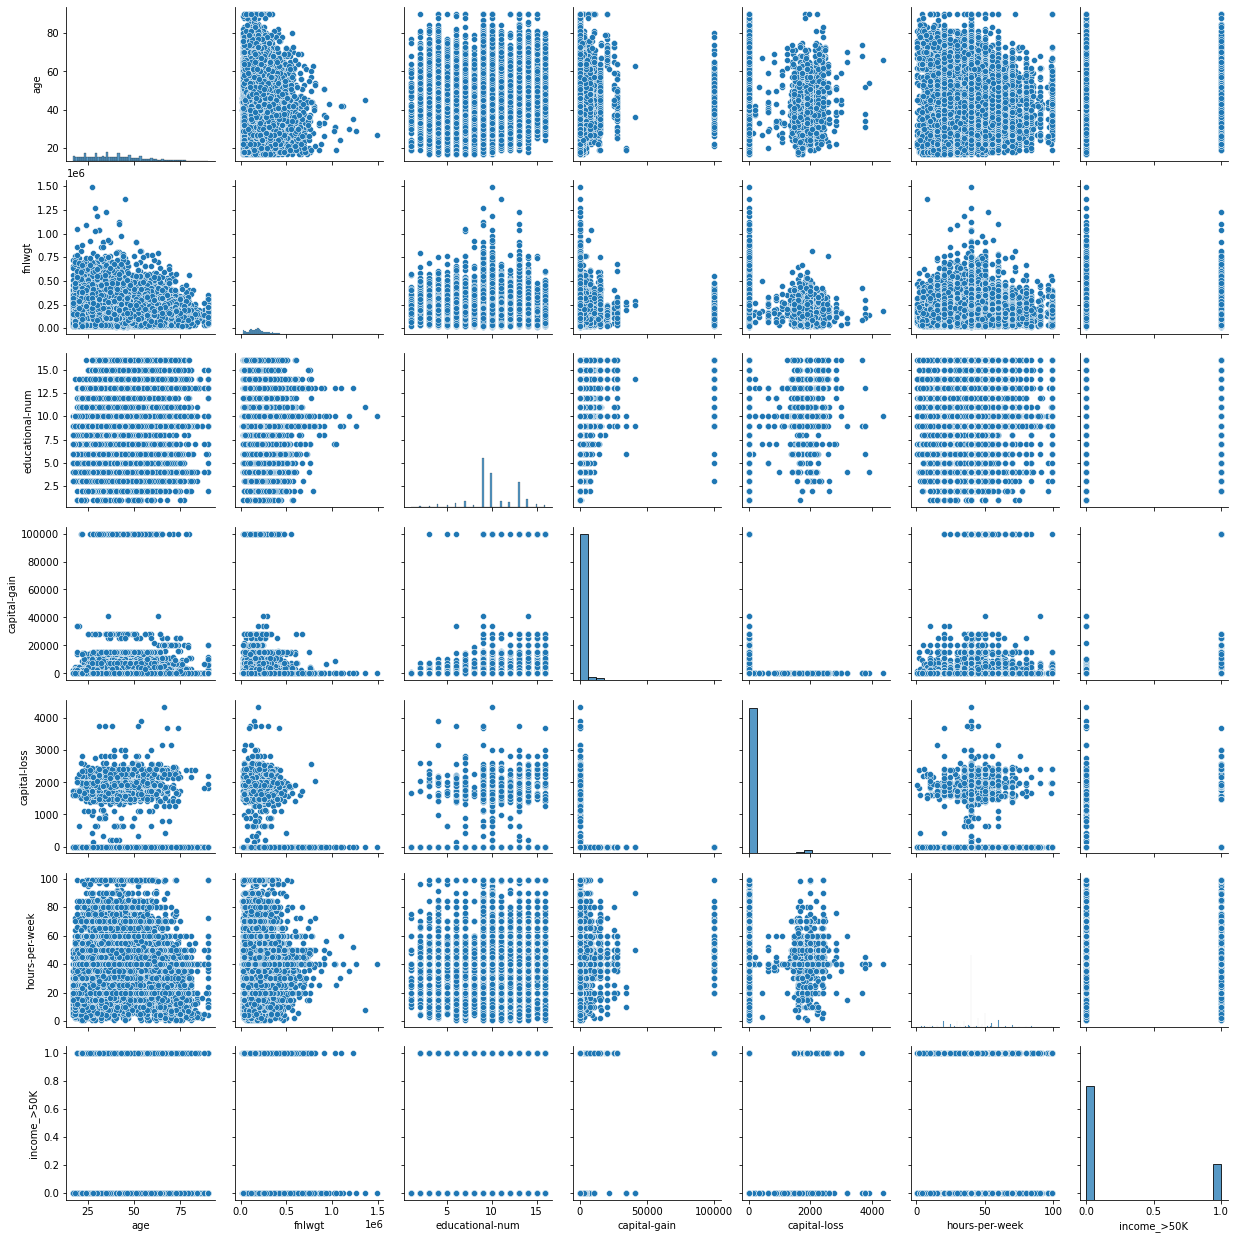

In [131]:
sns.pairplot(train_copy)
plt.show()

## 3.7 Study the pairwise interactions and correlations between attributes.

### 3.7.1 Age vs hours per week (Numerical vs Numerical feature)

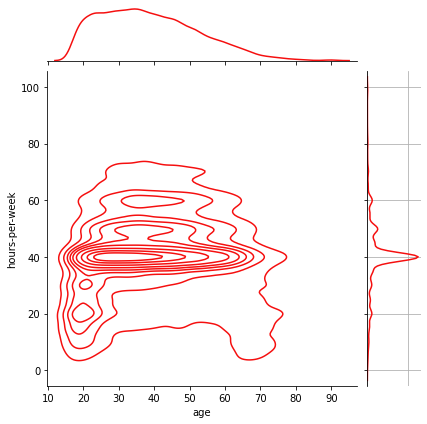

In [132]:
sns.jointplot(x='age', y='hours-per-week', data=train_copy, kind="kde", color="#f50f0f")
plt.grid()
plt.show()

### 3.7.2 Age vs educational number (Numerical vs Numerical feature)

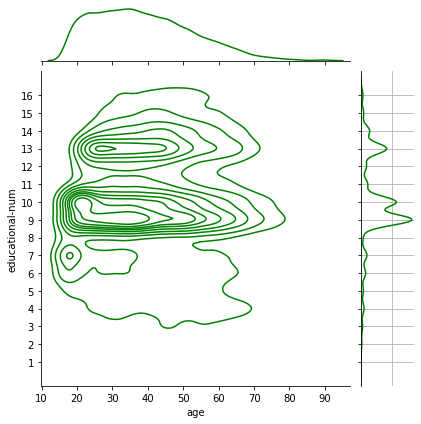

In [133]:
sns.jointplot(x='age', y='educational-num', data=train_copy, kind="kde", color="g")
plt.yticks(np.arange(1, train_copy['educational-num'].nunique()+1, 1))
plt.grid()
plt.show()

In [134]:
education_education_num_relation = pd.DataFrame(train_copy[['education','educational-num']].value_counts()).sort_values(by=['educational-num'], ascending=True).drop([0],axis=1)

In [135]:
education_education_num_relation

Empty DataFrame
Columns: []
Index: [(Preschool, 1), (1st-4th, 2), (5th-6th, 3), (7th-8th, 4), (9th, 5), (10th, 6), (11th, 7), (12th, 8), (HS-grad, 9), (Some-college, 10), (Assoc-voc, 11), (Assoc-acdm, 12), (Bachelors, 13), (Masters, 14), (Prof-school, 15), (Doctorate, 16)]

### 3.7.3 Educational-num vs hours-per-week (Numerical vs Numerical feature)

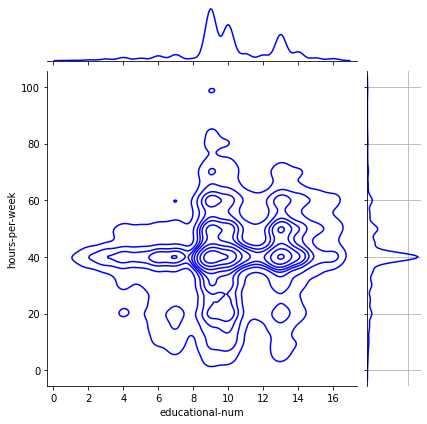

In [136]:
sns.jointplot(x='educational-num', y='hours-per-week', data=train_copy, kind="kde", color="b")
plt.grid()

### 3.7.4 Educational-num vs age (Numerical vs Numerical feature)

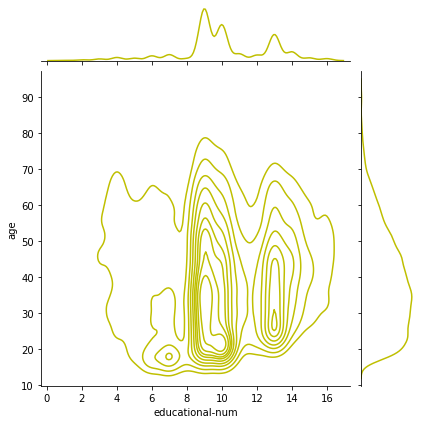

In [137]:
sns.jointplot(x='educational-num', y='age', data=train_copy, kind="kde", color="y")
plt.show()

### 3.7.5 Chi2 test for all the the categorical features (Categorical vs Categorical feature)

In [138]:
def chi2_test(feature_1,feature_2,show_contingency_table=False):
    # creating a cross tabulation of the two features
    feat_1_2_crosstab = pd.crosstab(train_copy[feature_1], train_copy[feature_2])
    stat, p, dof, cont_table = chi2_contingency(feat_1_2_crosstab)
    cont_table_df = pd.DataFrame(cont_table, index=feat_1_2_crosstab.index, columns=feat_1_2_crosstab.columns)
    # toggling the boolean to show the contingency table
    if show_contingency_table:
        print(cont_table_df)
    print('\n')
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('\n')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # Different implementation of chi2 test

    # df_ft_1 = df[feature_1].dropna(axis=0, how='any')
    # df_ft_2 = df[feature_2].dropna(axis=0, how='any')
    # data_crosstab = pd.crosstab(df_ft_1,df_ft_2,margins=True, margins_name="Total")

    # # significance level
    # alpha = 0.05

    # Calculation of Chisquare test statistics
    # chi_square = 0
    # rows = df_ft_1.unique()
    # columns = df_ft_2.unique()
    # for i in columns:
    #     for j in rows:
    #         O = data_crosstab[i][j]
    #         E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
    #         chi_square += (O-E)**2/E

    # # The p-value approach
    # print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    # p_value = 1 - norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    # conclusion = "Failed to reject the null hypothesis."
    # if p_value <= alpha:
    #     conclusion = "Null Hypothesis is rejected."
    # print("chisquare-score is:", chi_square, " and p value is:", p_value)
    # print(conclusion)
    # # The critical value approach
    # print("\n--------------------------------------------------------------------------------------")
    # print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    # critical_value = chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
    # conclusion = "Failed to reject the null hypothesis."
    # if chi_square > critical_value:
    #     conclusion = "Null Hypothesis is rejected."
    # print("chisquare-score is:", chi_square, " and p value is:", critical_value)
    # print(conclusion)

In [139]:
all_cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income_>50K']

In [140]:
for i in all_cat_features:
    for j in all_cat_features:
        chi2_test(i,j)



probability=0.950, critical=66.339, stat=237153.000
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=129.918, stat=2612.656
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=58.124, stat=1297.575
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=99.617, stat=9362.156
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=49.802, stat=1466.865
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=41.337, stat=519.266
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=14.067, stat=758.591
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=312.538, stat=510.731
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (re

### 3.7.6 ANOVA test of age vs the rest of categoricals features (Numerical vs continuous feature)

In [141]:
all_cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income_>50K']

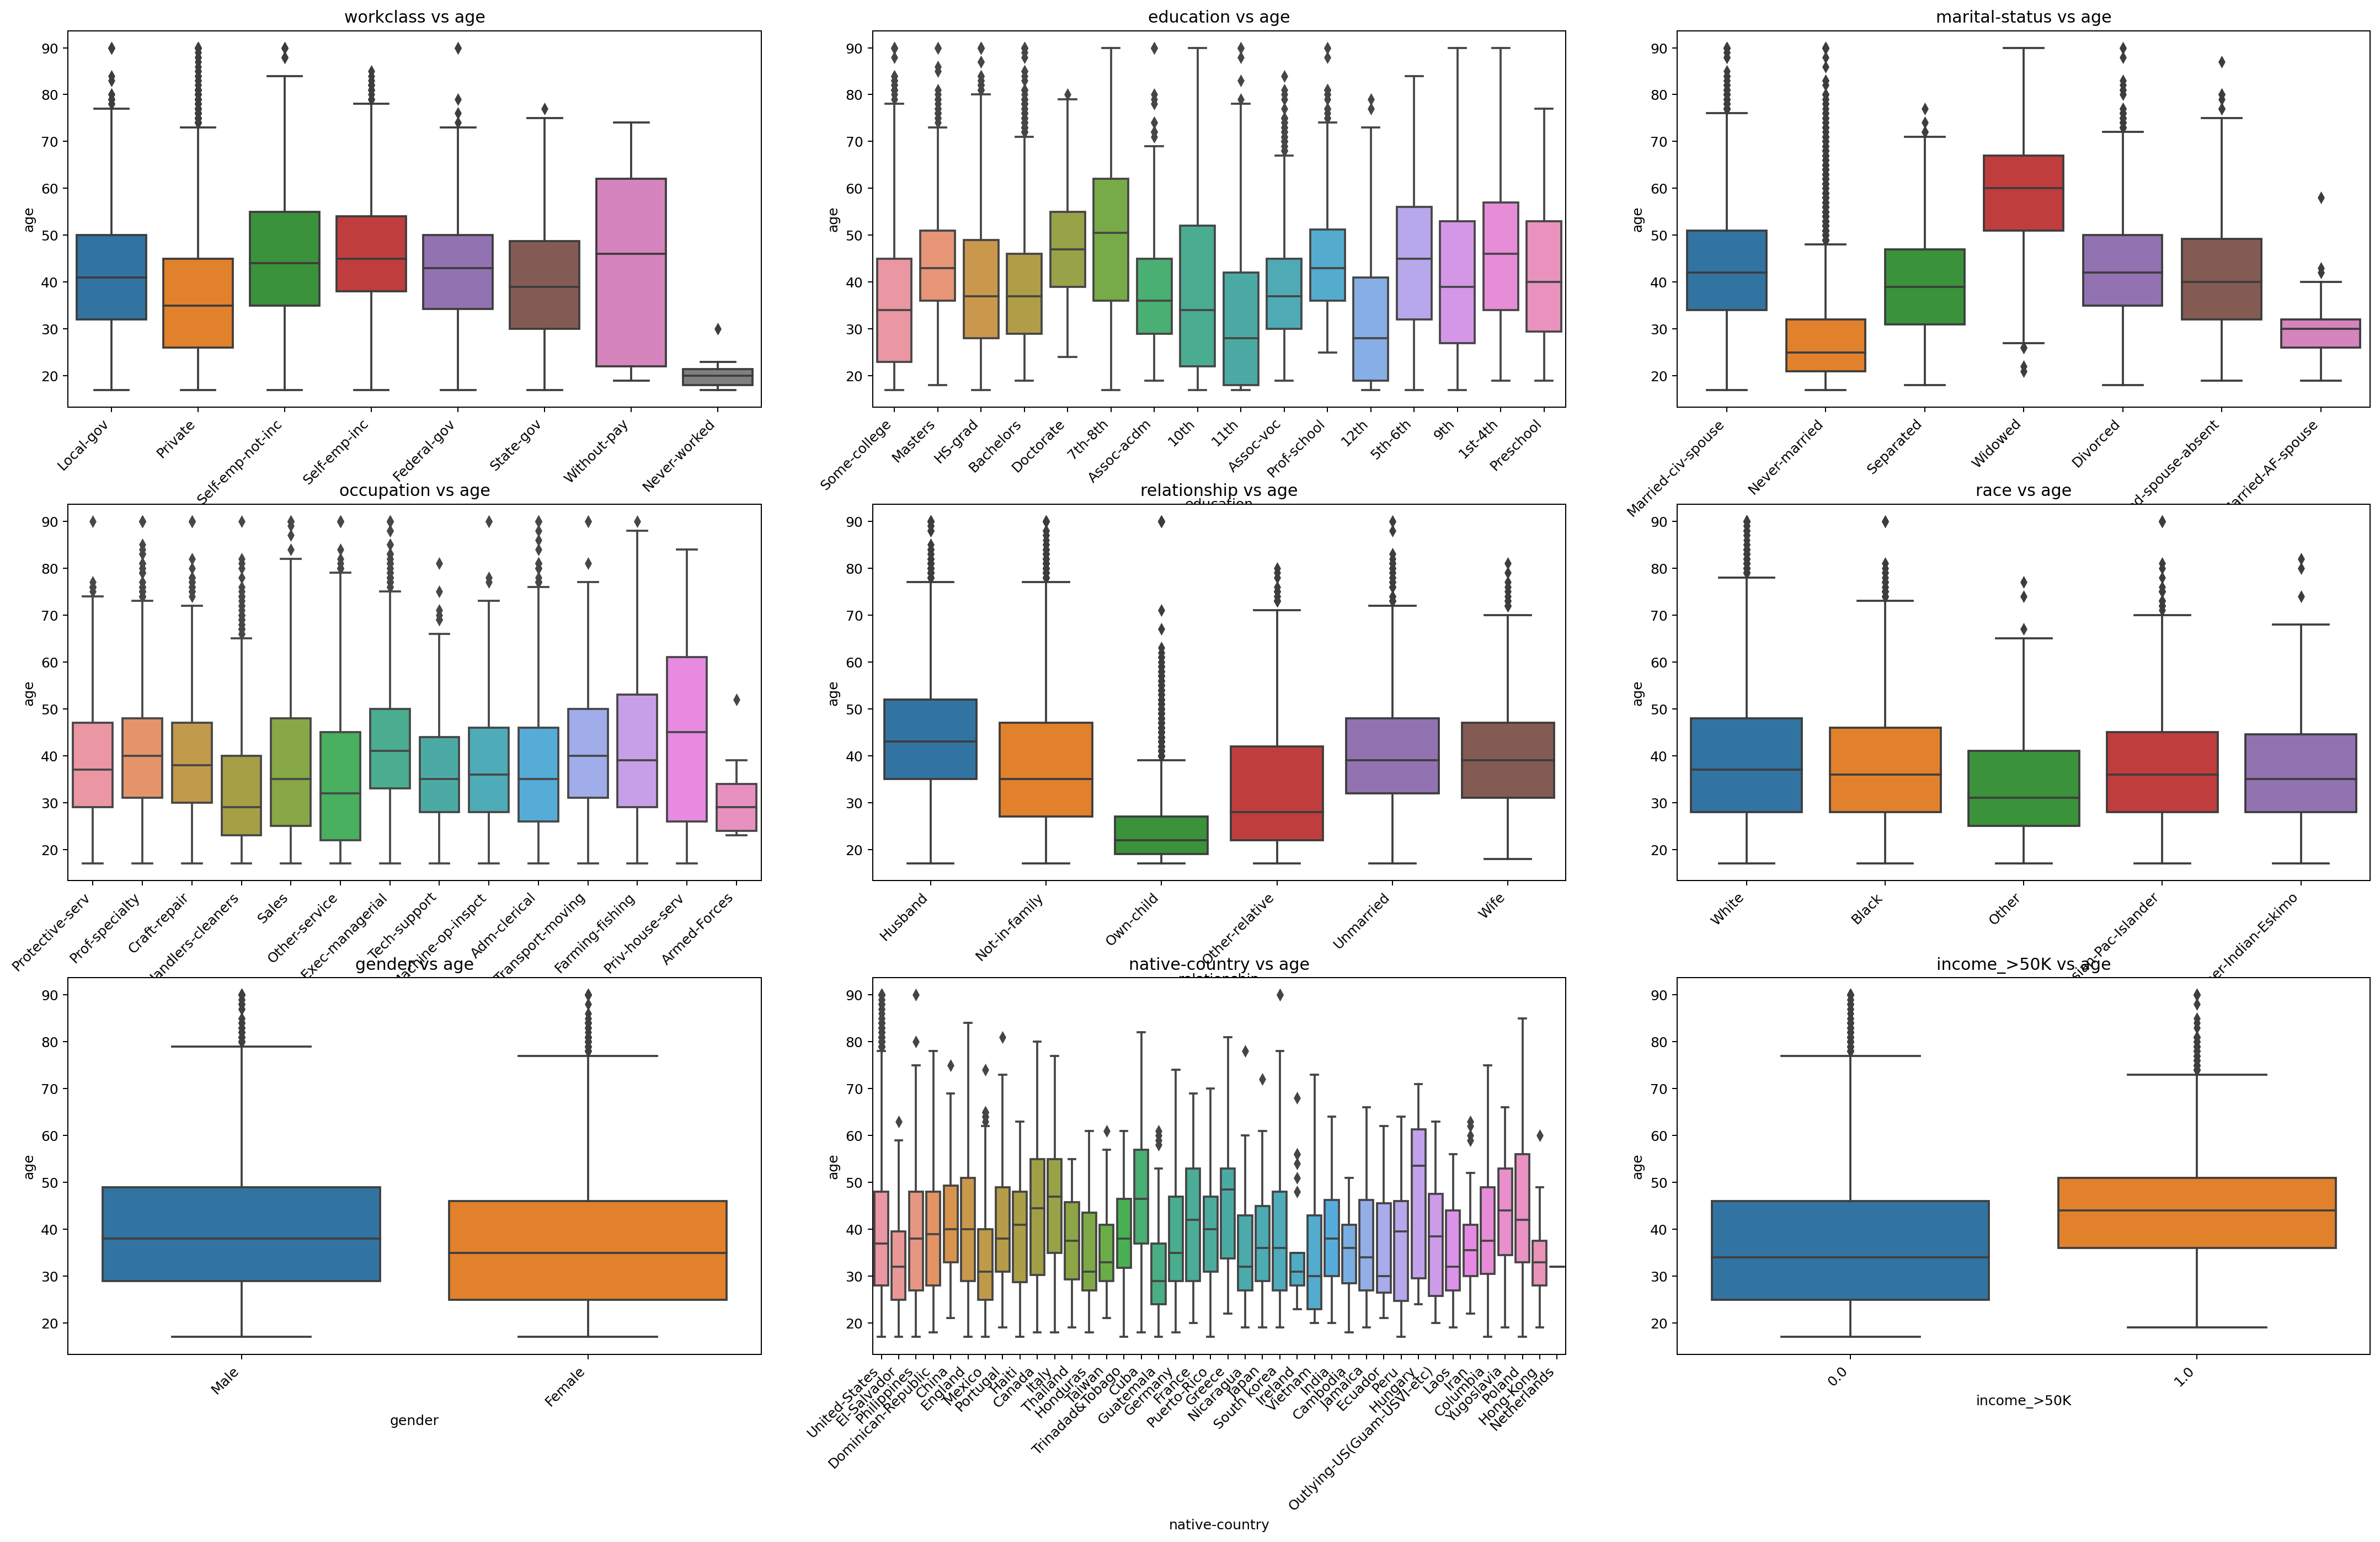

In [142]:
fig, axes = plt.subplots(3,3,figsize=(25,15),dpi=180)
fig.tight_layout(pad=5.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(3):
        for col_count in range(3):
            sns.boxplot(ax=axes[row_count,col_count],x=train_copy[all_cat_features[cat_ft_count]],y=train_copy['age'])
            axes[row_count,col_count].set_title(all_cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,col_count])
            plt.xticks(rotation=45,ha='right')
            cat_ft_count += 1
    break

### 3.7.7 Correlation between features

In [143]:
train_copy_corr = train_copy.corr()

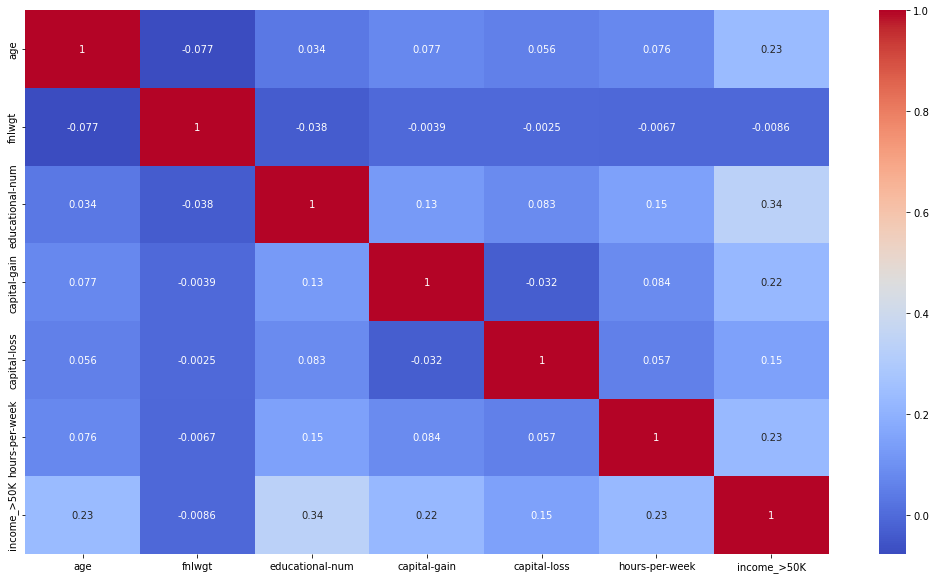

In [144]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(train_copy_corr, annot=True, cmap='coolwarm')
plt.show()

In [145]:
mask = np.zeros_like(train_copy_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
train_copy_corr[mask] = np.nan
(train_copy_corr
 .style
 .background_gradient(cmap='bwr', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
)

## 3.8 Study how you would solve the problem manually.

I would look at the correlation between the features and the target variable. the strongest correlation with the target variable is the age, educational-num, capital-gain and hours-per-week.

## 3.9 Identify the promising transformations you may want to apply.

Age:
- Drop outliers
- Min Max Scaling
- Fix skewness

Workclass:
- drop the feature because highly correlated with occupation with less information (To be done after running the model and seeing the feature importance method)
- one hot encoding

Fnwgt:
- drop the feature because there is no correlation with target

Education:
- One hot encoding

Education-num:
- drop the column(because we will use education feature)

Marital-status:
- One hot encoding
- Create a toggle that will use Marital-status, Relation or both to predict income

Occupation:
- One hot encoding
- Handle missing values

Relation:
- One hot encoding
- Create a toggle that will use Marital-status, Relation or both to predict income

Race:
- One hot encoding

Gender:
- One hot encoding

Capital gain:
- Fix skewness
- Min Max Scaling

Capital loss:
- Fix skewness
- Min Max Scaling

Hours per week:
- Min Max Scaling

Native country:
- Groupe countries into 3 GDP Categories (High, Medium, Low GDP)
- drop the feature because we have extracted the 3 GDP categories

GDP Category(extracted from the Native country):
- One hot encoding those categories

Income (Target):
- Fix imbalance data(SMOTE or oversampling)




## 3.10 Identify extra data that would be useful

In [146]:
# GDP data that will be used to group the countries by their GDP
# GDP data of countries in 1990
# Using 1990 data because the Train and test data is an old dataset. How do I know that? One of the country name is Yugoslavia which is no longer since the mid-1990's.
gdp_data = pd.read_csv('datasets/GDP.csv')

In [147]:
gdp_data.sort_values(by='1990' , inplace=True,ascending=False)

In [148]:
gdp_data.reset_index(inplace=True, drop=True)

In [149]:
gdp_data.rename(columns={'Country Name':'native-country','1990':'GDP_1990'},inplace=True)

In [150]:
gdp_data

native-country  GDP_1990
0                  Monaco 84303.880
1    United Arab Emirates 71359.170
2                  Brunei 54713.545
3           Liechtenstein 49373.610
4              Luxembourg 29664.795
..                    ...       ...
191           Afghanistan   292.000
192            Mozambique   244.601
193               Eritrea   147.000
194               Somalia   126.920
195              Cambodia   100.000

[196 rows x 2 columns]

In [151]:
def add_gdp_data(train_copy,test_copy,gdp_data):
        full_data_copy = pd.concat([train_copy,test_copy],ignore_index=True)
        gdp_group = []
        for idx in gdp_data.index:
            if idx <= 65:
                gdp_group.append('High GDP')
            elif idx >= 65 and idx <= 130:
                gdp_group.append('Medium GDP')
            else:
                gdp_group.append('Low GDP')

        # concatenate the gdp_data with the gdp_group list
        gdp_data = pd.concat([gdp_data.rename(columns={'country':'native-country'}), pd.Series(gdp_group, name='GDP Group')], axis=1)
        # we no longer need the GDP column, so let's drop it
        gdp_data.drop(['GDP_1990'],axis=1,inplace=True)

        # we need to merge the gdp_data with X dataframe
        full_data_copy = pd.merge(full_data_copy, gdp_data, on='native-country', how='left')
        # make income_>50K the last column
        new_col_order = [col for col in full_data_copy.columns if col != 'income_>50K'] + ['income_>50K']
        return full_data_copy[new_col_order]


In [152]:
full_data_copy = add_gdp_data(train_copy,test_copy,gdp_data)

In [153]:
train_copy, test_copy = data_split(full_data_copy,0.2)

## 3.11 Document what you have learned.

All the categorical features are highly correlated (category vs category) and the age and marital status, relationship are highly correlated (numerical vs continuous), finally target is highly correlated with the education, capital gain, age, hour-per-week (numerical vs numerical). 

# 4. Prepare the data for the model

## 4.1 Data cleaning

### 4.1.1 Fix or remove outliers

In [154]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_outliers = ['age']):
        self.col_with_outliers = col_with_outliers
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if (set(self.col_with_outliers).issubset(X.columns)):
            Q1 = X[self.col_with_outliers].quantile(.25)
            Q3 = X[self.col_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            outlier_condition = (X[self.col_with_outliers] < (Q1 - 1.5 * IQR)) | (X[self.col_with_outliers] > (Q3 + 1.5 * IQR))
            index_to_keep = X[~outlier_condition.any(axis=1)].index
            return X.loc[index_to_keep]
        else:
            print("Columns not found")
            return X

### 4.1.2 Fill in missing values (e.g., with zero, mean, median...) or drop their rows (or columns).

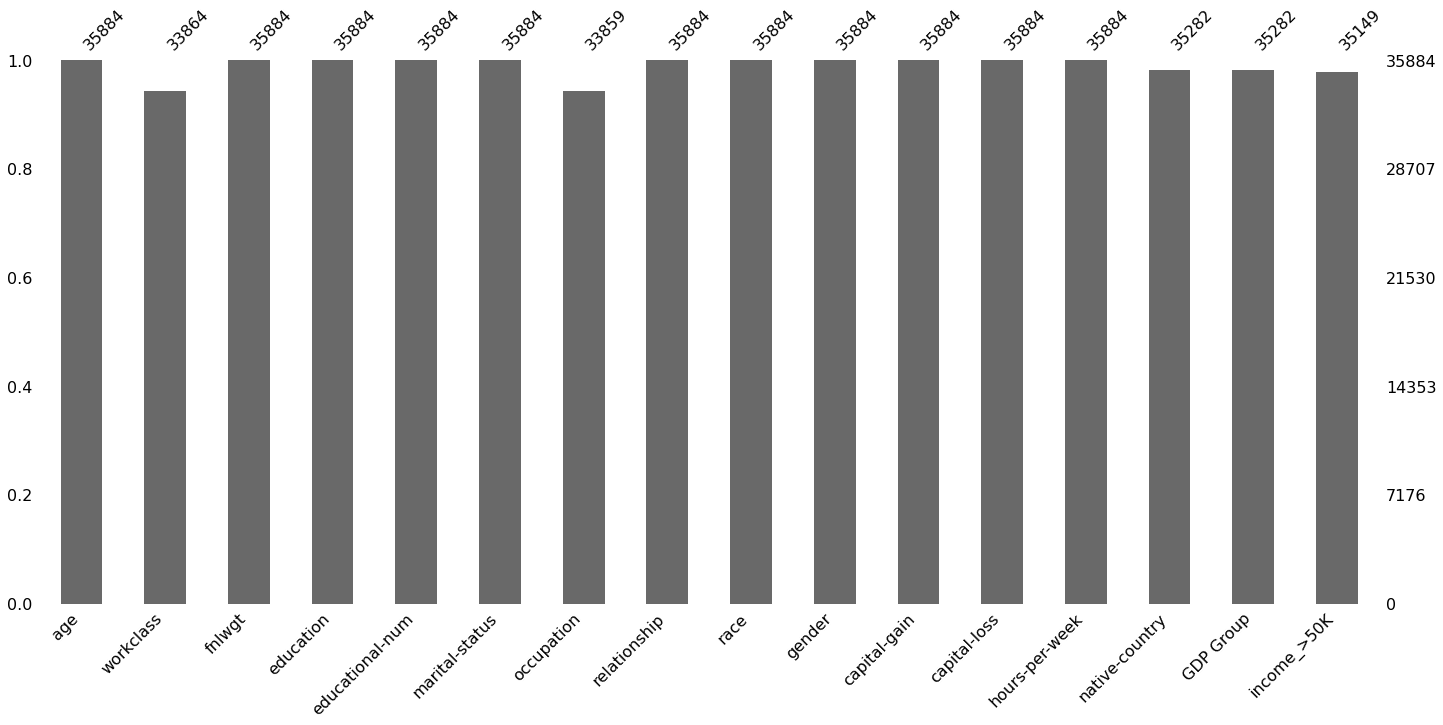

In [155]:
msno.bar(train_copy)
plt.show()

In [156]:
class MissingValHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        # drop all the rows with missing values in X
        X.dropna(inplace=True)
        X.reset_index(inplace=True, drop=True)
        return X

## 4.2 Feature selection

In [157]:
# using the feature importance method from the estimator, drop those features that have a low importance.
# drop_workclass will be called separately after running the model.
# drop_native_country will be called separately after running extraction the GDP group column
class FeatureToDrop(BaseEstimator,TransformerMixin):
    # def __init__(self,feature_to_drop = {'fnlwgt':True,'educational-num':True,'native-country':False,'workclass':False,'occupation':False}):
    #     self.feature_to_drop = feature_to_drop
    def __init__(self):
        self.feature_to_drop = ['fnlwgt','educational-num','native-country']
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        # for cols_to_drop in self.feature_to_drop.keys():
        #     if self.feature_to_drop[cols_to_drop] == True:
        #         # the column with the keys that were changed to True while initializing the class will be added to the list
        #         self.feature_to_drop_list.append(cols_to_drop)
        if (set(self.feature_to_drop).issubset(X.columns)):
            # drop the columns that were added to the list
            X.drop(self.feature_to_drop,axis=1,inplace=True)
            return X
        else:
            print('One or more columns to be dropped not found in the dataframe')
            return X

In [158]:
# TODO: Implement a feature selection function that takes in the least predictive features and drop them.

## 4.3 Feature Engineering and Transformation

In [159]:
# TODO: create a function that takes in the country and returns the 3 GDP categorories. This will be useful with the streamlit interface.

In [160]:
### 4.1.3.1 Marital and relationship status toggle

In [161]:
# class DropMaritalOrRelationship(BaseEstimator,TransformerMixin):
#     def __init__(self, drop_marital=False, drop_relationship=False):
#         self.drop_marital = drop_marital
#         self.drop_relationship = drop_relationship
#     def fit(self,X,y=None):
#         return self
#     def transform(self,X,y=None):
#         if self.drop_marital:
#             if (set(['marital']).issubset(X.columns)):
#                 X.drop('marital',axis=1,inplace=True)
#                 return X
#             else:
#                 print("marital column is not in the dataset")
#                 return X
#         elif self.drop_relationship:
#             if (set(['relationship']).issubset(X.columns)):
#                 X.drop('relationship',axis=1,inplace=True)
#                 return X
#             else:
#                 print("relationship column is not in the dataset")
#                 return X
#         elif (self.drop_marital) & (self.drop_relationship):
#             if (set(['marital','relationship']).issubset(X.columns)):
#                 X.drop(['marital','relationship'],axis=1,inplace=True)
#                 return X
#             else:
#                 print("relationship and marital columns are not in the dataset")
#                 return X
#         else:
#             print('marital status and relationship are kept in the dataset')
#             return X

### 4.1.3.2 Skewness fixings

For more information, refere to [this post](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55)

In [162]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_skewness=['age','capital-gain','capital-loss']):
        self.col_with_skewness = col_with_skewness
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if (set(self.col_with_skewness).issubset(X.columns)):
            # Handle skewness with cubic root transformation
            X[self.col_with_skewness] = np.cbrt(X[self.col_with_skewness])
            return X
        else:
            print('One or more skewed columns are not found')
            return X

### 4.1.3.3 Oversampling with SMOTE

In [163]:
class OversampleSMOTE(BaseEstimator,TransformerMixin):
    def __init__(self, perform_oversampling = True):
        self.perform_oversampling = perform_oversampling
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        # function to oversample the minority class
        if self.perform_oversampling:
            smote = SMOTE()
            X_bal, y_bal = smote.fit_resample(X.iloc[:,:-1],X.iloc[:,-1])
            X_y_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return X_y_bal
        else:
            print("No oversampling performed")
            return X

## 4.4 Feature scaling

Will be applied directly in the column transformer/pipeline because they are built in functions

## 4.5 Apply the column transformer and pipeline

In [164]:
def smote_pipeline_fuc(df):
    smote_pipeline = Pipeline([
        ('smote', OversampleSMOTE()) # default: perform_oversampling = True
    ])
    smote_pip_result = smote_pipeline.fit_transform(df)
    return smote_pip_result


In [165]:
def concat_fuc(df_ordinal_minmax, df_onehot, df_target):
    concat_df = pd.concat([df_ordinal_minmax, df_onehot, df_target], axis=1)
    return concat_df

In [166]:
def one_hot_enc_fuc(df):
    columns_to_one_hot_enc = ['race', 'gender', 'workclass', 'occupation','marital-status', 'relationship']
    # all the columns that can potentially be dropped in class FeatureToDrop
    # columns_that_can_be_dropped = ['workclass', 'occupation','marital-status', 'relationship', 'native-country']
    # for col in columns_that_can_be_dropped:
    #     if col in df.columns:
    #         #only do one hot encoding for the columns that are in the dataframe
    #         columns_to_one_hot_enc.append(col)

    one_hot_enc = OneHotEncoder()
    one_hot_enc.fit(df[columns_to_one_hot_enc])
    # get the result of the one hot encoding columns names
    cols_names_one_hot_enc = one_hot_enc.get_feature_names_out(columns_to_one_hot_enc)
    # change the array of the one hot encoding to a dataframe with the column names
    one_hot_result_with_names_col = pd.DataFrame(one_hot_enc.transform(df[columns_to_one_hot_enc]).toarray(),columns=cols_names_one_hot_enc)
    return one_hot_result_with_names_col

In [167]:
def ordinal_minmax_scaler_fuc(df):
    columns_to_ordinal_enc = ['education', 'GDP Group']
    columns_to_scale = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
    col_transformer = ColumnTransformer([
    ('Ordinal encoder',OrdinalEncoder(),columns_to_ordinal_enc), # ordinal encoding for education and GDP Group because they are ranked
    ('Min max scaler',MinMaxScaler(),columns_to_scale)]) # scaling for age, capital-gain, capital-loss, hours-per-week
    ordinal_minmax_scaler_result = col_transformer.fit_transform(df)
    ordinal_minmax_scaler_result_with_names_col = pd.DataFrame(ordinal_minmax_scaler_result,columns=columns_to_ordinal_enc+columns_to_scale)
    return ordinal_minmax_scaler_result_with_names_col

In [168]:
def extract_target_col(df):
    target = df.iloc[:,-1].to_frame().reset_index(drop=True)
    return target

In [169]:
def initial_pipeline_fuc(df):
    init_pipeline = Pipeline([
        #('Features to drop', FeatureToDrop(feature_to_drop = {'native-country':True,'occupation':True})), #default feature_to_drop_dic = {'fnlwgt':True,'educational-num':True,'native-country':False,'workclass':False,'occupation':False}
        ('Features to drop', FeatureToDrop()), # will drop fnlwgt and educational-num
        ('Missing values handler', MissingValHandler()), # drop missing values in the whole dataset
        ('Outliers handler', OutlierHandler()),
        #('Drop marital or relationship', DropMaritalOrRelationship()), # default: drop_marital=False, drop_relationship=False
        ('Skewness handler', SkewnessHandler()), # columns with skewness are 'age','capital-gain','capital-loss'
    ])
    init_pip_result = init_pipeline.fit_transform(df)
    return init_pip_result

In [170]:
def full_pipeline_fuc(df):
    # initial pipeline
    init_pip_result = initial_pipeline_fuc(df)
    #extracting the target variable
    target = extract_target_col(init_pip_result)
    # column transformers to apply ordinal and minmax transformation on specific columns
    ordinal_minmax_result = ordinal_minmax_scaler_fuc(init_pip_result)
    #one hot encoding
    one_hot_enc_result = one_hot_enc_fuc(init_pip_result)
    # concat the result from the ordinal and minmax transformation and one hot encoding with the target variable
    encoded_concat_result = concat_fuc(ordinal_minmax_result,one_hot_enc_result,target)
    # balance the imbalance data with smote function
    smote_pip_result = smote_pipeline_fuc(encoded_concat_result)
    return smote_pip_result

In [171]:
train_copy.head(2)

age  workclass  fnlwgt  education  educational-num marital-status  \
0   40  Local-gov   95639    HS-grad                9  Never-married   
1   46    Private  174224  Assoc-voc               11       Divorced   

        occupation    relationship                race gender  capital-gain  \
0     Craft-repair  Other-relative  Amer-Indian-Eskimo   Male             0   
1  Protective-serv   Not-in-family               Black   Male             0   

   capital-loss  hours-per-week native-country GDP Group  income_>50K  
0             0              40  United-States  High GDP        0.000  
1             0              40  United-States  High GDP        0.000

In [172]:
train_copy_prep = full_pipeline_fuc(train_copy)
train_copy_prep.shape
train_copy_prep.head(2)

education  GDP Group   age  capital-gain  capital-loss  hours-per-week  \
0     11.000      0.000 0.516         0.000         0.000           0.398   
1      8.000      0.000 0.615         0.000         0.000           0.398   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                    1.000                    0.000       0.000       0.000   
1                    0.000                    0.000       1.000       0.000   

   ...  marital-status_Never-married  marital-status_Separated  \
0  ...                         1.000                     0.000   
1  ...                         0.000                     0.000   

   marital-status_Widowed  relationship_Husband  relationship_Not-in-family  \
0                   0.000                 0.000                       0.000   
1                   0.000                 0.000                       1.000   

   relationship_Other-relative  relationship_Own-child  \
0                        1.000                   0.000   
1                        0.000                   0.000   

   relationship_Unmarried  relationship_Wife  income_>50K  
0                   0.000              0.000        0.000  
1                   0.000              0.000        0.000  

[2 rows x 48 columns]

In [173]:
pd.set_option('display.max_columns', None)
train_copy_prep

education  GDP Group   age  capital-gain  capital-loss  hours-per-week  \
0         11.000      0.000 0.516         0.000         0.000           0.398   
1          8.000      0.000 0.615         0.000         0.000           0.398   
2          0.000      0.000 0.829         0.000         0.000           0.398   
3          9.000      0.000 0.720         0.000         0.000           0.449   
4         11.000      0.000 0.881         0.000         0.000           0.173   
...          ...        ...   ...           ...           ...             ...   
48559     14.000      0.000 0.726         1.000         0.000           0.566   
48560     11.000      0.000 0.444         0.354         0.000           0.398   
48561      0.000      0.000 0.808         0.000         0.000           0.500   
48562      9.000      0.000 0.714         0.421         0.000           0.398   
48563     11.000      0.000 0.660         0.418         0.000           0.622   

       race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  \
0                        1.000                    0.000       0.000   
1                        0.000                    0.000       1.000   
2                        0.000                    0.000       0.000   
3                        0.000                    0.000       0.000   
4                        0.000                    0.000       0.000   
...                        ...                      ...         ...   
48559                    0.000                    0.000       0.000   
48560                    0.000                    0.000       0.000   
48561                    0.000                    0.000       0.000   
48562                    0.000                    0.000       0.000   
48563                    0.000                    0.000       0.000   

       race_Other  race_White  gender_Female  gender_Male  \
0           0.000       0.000          0.000        1.000   
1           0.000       0.000          0.000        1.000   
2           0.000       1.000          0.000        1.000   
3           0.000       1.000          0.000        1.000   
4           0.000       1.000          0.000        1.000   
...           ...         ...            ...          ...   
48559       0.000       1.000          0.000        1.000   
48560       0.000       1.000          0.000        1.000   
48561       0.000       1.000          0.000        1.000   
48562       0.000       1.000          0.000        1.000   
48563       0.000       1.000          0.000        1.000   

       workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0.000                1.000              0.000   
1                      0.000                0.000              1.000   
2                      0.000                0.000              1.000   
3                      0.000                0.000              1.000   
4                      0.000                0.000              1.000   
...                      ...                  ...                ...   
48559                  0.000                0.000              1.000   
48560                  0.000                0.000              1.000   
48561                  0.000                0.000              1.000   
48562                  1.000                0.000              0.000   
48563                  0.000                0.000              0.000   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                       0.000                       0.000   
1                       0.000                       0.000   
2                       0.000                       0.000   
3                       0.000                       0.000   
4                       0.000                       0.000   
...                       ...                         ...   
48559                   0.000                       0.000   
48560                   0.000                       0.000   
48561                   0.000     

In [174]:
test_copy_prep = full_pipeline_fuc(test_copy)
test_copy_prep.shape

(12294, 48)

In [175]:
X_train_copy_prep = train_copy_prep.iloc[:,:-1]
X_train_copy_prep.shape

(48564, 47)

In [176]:
y_train_copy_prep = train_copy_prep.iloc[:,-1]
y_train_copy_prep.shape

(48564,)

In [177]:
X_test_copy_prep = test_copy_prep.iloc[:,:-1]
X_test_copy_prep.shape

(12294, 47)

In [178]:
y_test_copy_prep = test_copy_prep.iloc[:,-1]
y_test_copy_prep.shape

(12294,)

# 5. Shorlist promising models

## 5.0 Functions to evaluate the model

In [179]:
def create_summary_table(summary_data):
    summary_table_col = [
        'Model name',
        'Precision score (Validation set)',
        'Recall score (Validation set)',
        'F1 score (Validation set)',
        'Accuracy score (Validation set)',
        'AUC score (Validation set)',
        'AUC score (Train set)',
        'Has overfit (AUC score (Train set) > AUC score (Validation set))',
        'Confusion matrix',
        'Roc auc curve',
        'Top 10 important features',
        'Top 10 useless features',
        'Top 10 important features plot',
        'Top 10 useless features plot',
        ]
    # print all the models summary
    summary_df = pd.DataFrame(summary_data, columns=summary_table_col).style.set_properties(subset=['Confusion matrix','Roc auc curve', 'Top 10 important features plot', 'Top 10 useless features plot'], **{'width': '432px','height': '432px'})
    # print only knn, random forest, NN, bagging, gradient boosting
    #summary_df = pd.DataFrame(summary_data, columns=summary_table_col).iloc[[4,6,7,9,10]].style.set_properties(subset=['Confusion matrix','Roc auc curve'], **{'width': '432px','height': '432px'})
    display(HTML(summary_df.to_html()))

In [180]:
def top_and_worst_feat_fuc(col_with_coef):
    top_10_feat, worst_10_feat = col_with_coef[:10], col_with_coef[-10:]
    top_10_feat_str = ""
    worst_10_feat_str = ""
    for count,feat in enumerate(top_10_feat, start=1):
        # top 10 features string formatting
        top_10_feat_str += "{0}. feature name: {1}".format(count,feat[0])+ "<br>" + "coefficient: {:.4f}".format(feat[1]) + "<br>"
    for count,feat in enumerate(worst_10_feat, start=1):
        # worst 10 features string formatting
        worst_10_feat_str += "{0}. feature name: {1}".format(count,feat[0])+ "<br>" + "coefficient: {:.4f}".format(feat[1]) + "<br>"
    return top_10_feat_str, worst_10_feat_str

In [181]:
def check_overfit(auc_score_val_set, auc_score_train_set):
    # if the auc score of the training set is higher than the validation set by more than 0.03, then the model is overfitting
    if (auc_score_train_set - auc_score_val_set) > 0.03:
        return True
    else:
        return False

In [182]:
summary_data = []
def growing_summary_table_fuc(model_name,precision_score,recall_score,f1_score, accuracy_score, auc_score_val_set, auc_score_train_set, is_overfitting, img_conf_matrix, img_roc_auc, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html):
    if col_with_coef == 'No coeficient or feature importance for this model':
        each_clf_data = [model_name,precision_score,recall_score,f1_score, accuracy_score, auc_score_val_set, auc_score_train_set, is_overfitting, img_conf_matrix, img_roc_auc, col_with_coef, col_with_coef, col_with_coef, col_with_coef]
        summary_data.append(each_clf_data)
    else:
        top_10_feat, worst_10_feat = top_and_worst_feat_fuc(col_with_coef)
        each_clf_data = [model_name,precision_score,recall_score,f1_score, accuracy_score, auc_score_val_set, auc_score_train_set, is_overfitting, img_conf_matrix, img_roc_auc, top_10_feat, worst_10_feat, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html]
        summary_data.append(each_clf_data)

In [183]:
def roc_curve_fuc(model_trn,model_name,X_train_copy_prep,y_train_copy_prep):
    # path to save the roc curve
    roc_curve_path = Path('saved_preliminary_models/{0}/{0}_roc_curve.jpg'.format(model_name))
    try:
        roc_curve_path.resolve(strict=True)
    except FileNotFoundError:
        print('\n                ROC curve\n')
        lower_than_50k_probs = [0 for _ in range(len(y_train_copy_prep))]
        higher_than_50k_probs = model_trn.predict_proba(X_train_copy_prep)
        higher_than_50k_probs_pos_outcome = higher_than_50k_probs[:,1]
        lower_than_50k_auc = roc_auc_score(y_train_copy_prep,lower_than_50k_probs)
        higher_than_50k_probs_auc = roc_auc_score(y_train_copy_prep,higher_than_50k_probs_pos_outcome)
        #save the auc
        with open('saved_preliminary_models/{0}/lower_than_50k_auc_{0}.pickle'.format(model_name),'wb') as handle:
            pickle.dump(lower_than_50k_auc,handle)
        with open('saved_preliminary_models/{0}/higher_than_50k_probs_auc_{0}.pickle'.format(model_name),'wb') as handle:
            pickle.dump(higher_than_50k_probs_auc,handle)
        # print the auc
        print('Income lower than 50k: ROC AUC=%.3f' % (lower_than_50k_auc))
        print('Income higher than 50k: ROC AUC=%.3f' % (higher_than_50k_probs_auc))
        lower_than_50k_false_pos_rate, lower_than_50k_true_pos_rate, _ = roc_curve(y_train_copy_prep,lower_than_50k_probs)
        higher_than_50k_false_pos_rate, higher_than_50k_true_pos_rate, _ = roc_curve(y_train_copy_prep,higher_than_50k_probs_pos_outcome)
        plt.plot(lower_than_50k_false_pos_rate, lower_than_50k_true_pos_rate, linestyle='--', label='Income lower than 50k')
        plt.plot(higher_than_50k_false_pos_rate, higher_than_50k_true_pos_rate, marker='.', label='Income higher than 50k')
        # axis labels
        plt.xlabel('False Positive Rate (Fall-Out)')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title('ROC curve')
        # show the legend
        plt.legend()
        # save the plot
        plt.savefig('saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name))
        # show the plot
        plt.show()
        # creating the html roc auc curve image
        img_roc_auc = '<img src="'+ 'saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name) + '">'
        return higher_than_50k_probs_auc, img_roc_auc
    else:
        # if roc curve path exists, load the auc first
        with open('saved_preliminary_models/{0}/lower_than_50k_auc_{0}.pickle'.format(model_name),'rb') as handle:
                lower_than_50k_auc = pickle.load(handle)
        with open('saved_preliminary_models/{0}/higher_than_50k_probs_auc_{0}.pickle'.format(model_name),'rb') as handle:
                higher_than_50k_probs_auc = pickle.load(handle)
        # print the auc
        print('Income lower than 50k: ROC AUC=%.3f' % (lower_than_50k_auc))
        print('Income higher than 50k: ROC AUC=%.3f' % (higher_than_50k_probs_auc))
        # read the ROC image
        img_roc = mpimg.imread('saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name))
        # plot the ROC image
        img_roc_plot = plt.imshow(img_roc)
        #remove the axis
        plt.axis('off')
        # show the plot
        plt.show()
        # creating the html roc auc curve image
        img_roc_auc = '<img src="'+ 'saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name) + '">'
        return higher_than_50k_probs_auc, img_roc_auc


In [184]:
def confusion_matrix_fuc(model_name,y_train_copy_prep,y_train_copy_pred):
    #path to save the confusion matrix
    confusion_matrix_path = Path('saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name))
    try:
        #check if the path exists
        confusion_matrix_path.resolve(strict=True)
    except FileNotFoundError:
        print('\n         Confusion Matrix\n')
        #plot confusion matrix
        confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_train_copy_prep,y_train_copy_pred, cmap='Blues',values_format='d')
        #give a title to the plot using the model name
        plt.title('Confusion Matrix')
        #save the plot as jpg
        plt.savefig('saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name))
        #show the plot
        plt.show()
        #img_conf_matrix = 'saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name)
        img_conf_matrix_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name) + '">'
        return img_conf_matrix_html
    else:
        img_conf_matrix_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name) + '">'
        img_conf_matrix = mpimg.imread('saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name))
        # plot the confusion matrix image
        img_conf_matrix_plot = plt.imshow(img_conf_matrix)
        # disable the axis
        plt.axis('off')
        plt.show()
        return img_conf_matrix_html

In [185]:
def scores_cal_fuc(model_name,X_train_copy_prep,y_train_copy_prep):
    score_list = ['precision','recall','f1','accuracy','roc_auc']
    scores = []
    scores_mean_for_each_type = []
    scores_mean = 0
    scores_std = 0
    # path to save the model folder
    model_dir_path = Path('saved_preliminary_models/{0}/'.format(model_name))
    files_start_with_score_path = []
    #for loop to check if there is any file start with 'score' in the model folder
    for i in os.listdir(model_dir_path):
        if os.path.isfile(os.path.join(model_dir_path,i)) and 'score' in i:
            files_start_with_score_path.append(os.path.join(model_dir_path,i))
    # file that start with 'score' found, load the scores list, mean and std using pickle
    if files_start_with_score_path:
        for score_type in score_list:
            # load the scores list
            with open('saved_preliminary_models/{0}/score_{1}_list.pickle'.format(model_name,score_type),'rb') as handle:
                scores = pickle.load(handle)
            # load the mean score
            with open('saved_preliminary_models/{0}/score_{1}_mean.pickle'.format(model_name,score_type),'rb') as handle:
                scores_mean = pickle.load(handle)
                scores_mean_for_each_type.append(scores_mean)
            # load the std score
            with open('saved_preliminary_models/{0}/score_{1}_std.pickle'.format(model_name,score_type),'rb') as handle:
                scores_std = pickle.load(handle)
            print('\n                        {} score\n'.format(score_type))
            print('Scores: {}\n'.format(scores))
            print('Mean of the scores: {}\n'.format(scores_mean))
            print('Standard deviation of the scores: {}\n\n'.format(scores_std))
        return scores_mean_for_each_type
    # no file start with score in the model folder
    else:
        for score_type in score_list:
            # calculate the scores for each score type using kfold cross validation
            scores = cross_val_score(model,X_train_copy_prep,y_train_copy_prep,scoring=score_type,cv=10,n_jobs=-1)
            scores_mean = scores.mean()
            scores_mean_for_each_type.append(scores_mean)
            scores_std = scores.std()
            print('\n                        {} score\n'.format(score_type))
            print('Scores: {}\n'.format(scores))
            print('Mean of the scores: {}\n'.format(scores_mean))
            print('Standard deviation of the scores: {}\n\n'.format(scores_std))
            # save the scores using pickle
            with open('saved_preliminary_models/{0}/score_{1}_list.pickle'.format(model_name,score_type),'wb') as handle:
                pickle.dump(scores,handle)
            # save the mean scores using pickle
            with open('saved_preliminary_models/{0}/score_{1}_mean.pickle'.format(model_name,score_type),'wb') as handle:
                pickle.dump(scores_mean,handle)
            # save the standard deviation scores using pickle
            with open('saved_preliminary_models/{0}/score_{1}_std.pickle'.format(model_name,score_type),'wb') as handle:
                pickle.dump(scores_std,handle)
        return scores_mean_for_each_type

In [186]:
def classification_report_fuc(model_name,y_train_copy_prep,y_train_copy_pred):
    # path to save the classification report
    class_rep_path = Path('saved_preliminary_models/{0}/class_rep_{0}.pickle'.format(model_name))
    try:
        #check if the path exists
        class_rep_path.resolve(strict=True)
    except FileNotFoundError:
        #cross validation prediction with kfold = 10
        print('\n                Classification Report\n')
        #classification report
        cls_rep = classification_report(y_train_copy_prep,y_train_copy_pred)
        print(cls_rep)
        # save the classification report
        with open('saved_preliminary_models/{0}/class_rep_{0}.pickle'.format(model_name),'wb') as handle:
            pickle.dump(cls_rep,handle)
        return cls_rep
    else:
        # if it exist load the classification report
        with open('saved_preliminary_models/{0}/class_rep_{0}.pickle'.format(model_name),'rb') as handle:
            cls_rep = pickle.load(handle)
            print('                       {} Classification Report\n'.format(model_name))
            print(cls_rep)
            return cls_rep

In [187]:
def load_coef_and_plot(model_name):
    with open('saved_preliminary_models/{0}/coef_{0}.pickle'.format(model_name),'rb') as handle:
        col_with_coef = pickle.load(handle)
    # print the coefficients of the model
    print("\nCoefficients for feature importance:\n")
    [print(i) for i in col_with_coef]
    print('\n')
    # load top 10 features image and plot it
    img_col_with_coef_df_top_10 = mpimg.imread('saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name))
    # plot the confusion matrix image
    img_col_with_coef_df_top_10_plot = plt.imshow(img_col_with_coef_df_top_10)
    #remove the axis
    plt.axis('off')
    plt.show()
    # load bottom 10 features image and plot it
    img_col_with_coef_df_bottom_10 = mpimg.imread('saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name))
    # plot the confusion matrix image
    img_col_with_coef_df_bottom_10_plot = plt.imshow(img_col_with_coef_df_bottom_10)
    #remove the axis
    plt.axis('off')
    plt.show()
    # save the top 10 features plot to a html tag
    col_with_coef_df_top_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name) + '">'
    # save the bottom 10 features plot to a html tag
    col_with_coef_df_bottom_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name) + '">'

    return col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html


In [188]:
def fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef):
    columns_names = X_train_copy_prep.columns
    col_with_coef = list(zip(columns_names,coef))
    print("\nCoefficients for feature importance:\n")
    col_with_coef.sort(key=lambda x: x[1],reverse=True)
    [print(i) for i in col_with_coef]
    print('\n')
    # horizontal bar plot of the top 10 features
    col_with_coef_df_top_10 = pd.DataFrame(col_with_coef[:10], columns=['Columns','Coefficients'])
    # horizontal bar plot of the bottom 10 features
    col_with_coef_df_bottom_10 = pd.DataFrame(col_with_coef[-10:], columns=['Columns','Coefficients'])
    sns.barplot(y=col_with_coef_df_top_10['Columns'],x=col_with_coef_df_top_10['Coefficients'])
    # save the plot to a jpg file
    plt.savefig('saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name))
    plt.show()
    sns.barplot(y=col_with_coef_df_bottom_10['Columns'],x=col_with_coef_df_bottom_10['Coefficients'])
    # save the plot to a jpg file
    plt.savefig('saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name))
    plt.show()
    # save the coefficients of the model to pickle
    with open('saved_preliminary_models/{0}/coef_{0}.pickle'.format(model_name),'wb') as handle:
        pickle.dump(col_with_coef,handle)
    # save the top 10 features plot to a html tag
    col_with_coef_df_top_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name) + '">'
    # save the bottom 10 features plot to a html tag
    col_with_coef_df_bottom_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name) + '">'

    return col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html

In [189]:
def folder_and_file_model_check(model, model_name, X_train_copy_prep, y_train_copy_prep):
    col_with_coef = []
    col_with_coef_df_top_10_html = ''
    col_with_coef_df_bottom_10_html = ''
    # check if the folder with the model name exist and if not create them
    if not os.path.exists('saved_preliminary_models/{}'.format(model_name)):
        os.makedirs('saved_preliminary_models/{}'.format(model_name))
    # check if the model file exist and if not create, train and save it
    model_file_path = Path('saved_preliminary_models/{0}/{0}_model.sav'.format(model_name))
    try:
        model_file_path.resolve(strict=True)
    except FileNotFoundError:
        model_trn = model.fit(X_train_copy_prep,y_train_copy_prep)
        joblib.dump(model_trn,model_file_path)
        # coeficient of the model for feature importance using switch-case statement [new in Python 3.10]
        match model_name:
            # for sgd, logistic regression and linear discriminant analysis, use coef_
            case 'SGD' | 'Logistic_regression' | 'Linear_discriminant_analysis':
                coef_of_each_feat = model_trn.coef_[0]
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            #  no coefficients for the svm model as it took a while to train
            case 'Support_vector_machine':
                # no coefficients or feature importance
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            # for decision tree, random forest, gradient boosting, adaboost and Extra_trees, use feature_importances_
            case 'Decision_tree' | 'Random_forest' | 'Gradient_boosting' | 'AdaBoost' | 'Extra_trees':
                coef_of_each_feat = model_trn.feature_importances_
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            # does not have does not offer an intrinsic method to evaluate feature importance. refer to https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes, will use permutation_importance
            case 'Gaussian_naive_bayes':
                #Gaussian naive uses the permutation importance method to evaluate feature importance
                imps = permutation_importance(model_trn, X_train_copy_prep, y_train_copy_prep)
                coef_of_each_feat = imps.importances_mean
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            # Feature importance is not defined for the KNN Classification algorithm
            case 'K-Nearest_neighbors':
                # no coefficients or feature importance
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            case 'Bagging':
                coef_of_each_feat = np.mean([tree.feature_importances_ for tree in model_trn.estimators_], axis=0)
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            # Feature importance is not defined for the Neural Network Classification algorithm
            case 'Neural_network':
                # no coefficients or feature importance
                col_with_coef = 'No coeficient or feature importance for this model'
                pass



    else:
        # if it exist load the model
        model_trn = joblib.load(model_file_path)
        #load the coefficients of the model from pickle
        match model_name:
            case 'SGD' | 'Logistic_regression' | 'Linear_discriminant_analysis':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'Support_vector_machine':
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            case 'Decision_tree' | 'Random_forest' | 'Gradient_boosting' | 'AdaBoost' | 'Extra_trees':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'Gaussian_naive_bayes':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'K-Nearest_neighbors':
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            case 'Bagging':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'Neural_network':
                col_with_coef = 'No coeficient or feature importance for this model'
                pass


    # check if y_train_copy_prep exist and if not create it
    y_train_copy_pred_path = Path('saved_preliminary_models/{0}/y_train_copy_pred_{0}.sav'.format(model_name))
    try:
        y_train_copy_pred_path.resolve(strict=True)
    except FileNotFoundError:
        #cross validation prediction with kfold = 10
        y_train_copy_pred = cross_val_predict(model_trn,X_train_copy_prep,y_train_copy_prep,cv=10,n_jobs=-1)
        #save the predictions
        joblib.dump(y_train_copy_pred,y_train_copy_pred_path)
        #print(y_train_copy_pred, model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html)
        return y_train_copy_pred, model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html
    else:
        # if it exist load the predictions
        y_train_copy_pred = joblib.load(y_train_copy_pred_path)
        #print(y_train_copy_pred, model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html)
        return y_train_copy_pred, model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html

In [190]:
def evaluate_model(model,model_name,X_train_copy_prep,y_train_copy_prep):
    print('\n       ***************  {}  ***************\n'.format(model_name))
    folder_and_file_model_check(model,model_name,X_train_copy_prep,y_train_copy_prep)
    #create the folder and the model file if they don't exist
    y_train_copy_pred,model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = folder_and_file_model_check(model,model_name,X_train_copy_prep,y_train_copy_prep)
    # return the classification report
    classification_report_fuc(model_name,y_train_copy_prep,y_train_copy_pred)
    # print the scores by score type, mean scores and std scores and return the mean scores
    scores_mean= scores_cal_fuc(model_name,X_train_copy_prep,y_train_copy_prep)
    # return the confusion matrix
    img_conf_matrix = confusion_matrix_fuc(model_name,y_train_copy_prep,y_train_copy_pred)
    # return the ROC curve and numpy array of image auc and roc curve
    auc_score_train, img_roc_auc  = roc_curve_fuc(model_trn,model_name,X_train_copy_prep,y_train_copy_prep)
    # check if the model has overfit
    is_overfitting = check_overfit(scores_mean[4],auc_score_train)
    # create a comparison summary table
    growing_summary_table_fuc(model_name, scores_mean[0], scores_mean[1], scores_mean[2], scores_mean[3], scores_mean[4], auc_score_train, is_overfitting, img_conf_matrix, img_roc_auc, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html)

## 5.1 Quick models comparison

In [191]:
model_dict = {
    'SGD':SGDClassifier(random_state=42,loss='log'),
    'Logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    #'Support_vector_machine':SVC(random_state=42,probability=True),
    'Decision_tree':DecisionTreeClassifier(random_state=42),
    'Random_forest':RandomForestClassifier(random_state=42,n_estimators=1000,max_features=20,max_depth=7,min_samples_leaf=3),
    'Gaussian_naive_bayes':GaussianNB(),
    'K-Nearest_neighbors':KNeighborsClassifier(),
    'Gradient_boosting':GradientBoostingClassifier(random_state=42),
    'Linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'Bagging':BaggingClassifier(random_state=42),
    'Neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'AdaBoost':AdaBoostClassifier(random_state=42),
    'Extra_trees':ExtraTreesClassifier(random_state=42),
}


       ***************  SGD  ***************


Coefficients for feature importance:

('capital-gain', 5.311594522557437)
('gender_Male', 4.2132786516844565)
('gender_Female', 3.4754131938779307)
('hours-per-week', 3.4135272717280736)
('marital-status_Married-civ-spouse', 2.96668333545029)
('relationship_Wife', 2.578576127344863)
('race_Asian-Pac-Islander', 2.2386671213336857)
('occupation_Prof-specialty', 2.1518387307839526)
('age', 2.0912693246305176)
('race_White', 2.0474554330243158)
('occupation_Exec-managerial', 1.873990137347546)
('workclass_Federal-gov', 1.8195197258954312)
('race_Black', 1.692502185628745)
('relationship_Not-in-family', 1.6111195242945144)
('capital-loss', 1.4288376124891813)
('relationship_Husband', 1.4204315397054177)
('occupation_Tech-support', 1.413602237215092)
('workclass_Self-emp-inc', 1.4012267987082214)
('workclass_Private', 1.3347848848658324)
('relationship_Unmarried', 1.2896582631359848)
('marital-status_Married-AF-spouse', 1.2572834661235224)
('wo

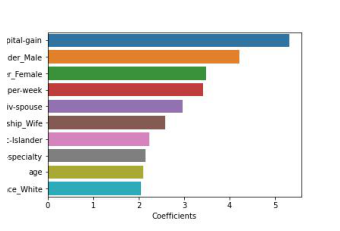

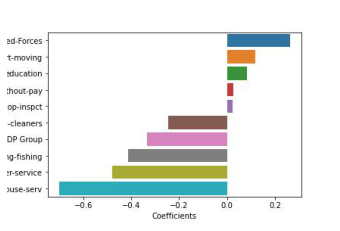


Coefficients for feature importance:

('capital-gain', 5.311594522557437)
('gender_Male', 4.2132786516844565)
('gender_Female', 3.4754131938779307)
('hours-per-week', 3.4135272717280736)
('marital-status_Married-civ-spouse', 2.96668333545029)
('relationship_Wife', 2.578576127344863)
('race_Asian-Pac-Islander', 2.2386671213336857)
('occupation_Prof-specialty', 2.1518387307839526)
('age', 2.0912693246305176)
('race_White', 2.0474554330243158)
('occupation_Exec-managerial', 1.873990137347546)
('workclass_Federal-gov', 1.8195197258954312)
('race_Black', 1.692502185628745)
('relationship_Not-in-family', 1.6111195242945144)
('capital-loss', 1.4288376124891813)
('relationship_Husband', 1.4204315397054177)
('occupation_Tech-support', 1.413602237215092)
('workclass_Self-emp-inc', 1.4012267987082214)
('workclass_Private', 1.3347848848658324)
('relationship_Unmarried', 1.2896582631359848)
('marital-status_Married-AF-spouse', 1.2572834661235224)
('workclass_Local-gov', 1.2518544371407243)
('occup

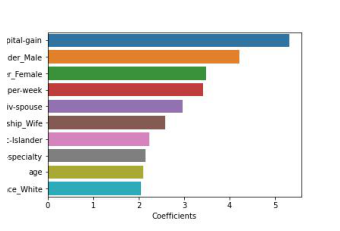

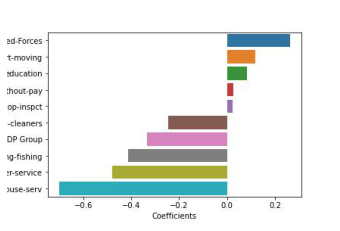

                       SGD Classification Report

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79     24387
         1.0       0.79      0.80      0.79     24387

    accuracy                           0.79     48774
   macro avg       0.79      0.79      0.79     48774
weighted avg       0.79      0.79      0.79     48774


                        precision score

Scores: [0.86531131 0.78609422 0.79765625 0.87055394 0.79726132 0.74806332
 0.77912088 0.8528464  0.69473064 0.78019948]

Mean of the scores: 0.7971837764973068

Standard deviation of the scores: 0.05173999810915827



                        recall score

Scores: [0.55842558 0.84829848 0.83722837 0.61213612 0.85972108 0.91099262
 0.87243642 0.65108651 0.96760968 0.86592866]

Mean of the scores: 0.7983863530185753

Standard deviation of the scores: 0.1315642485182111



                        f1 score

Scores: [0.67879392 0.81601262 0.81696339 0.71882523 0.82731399 0.821527

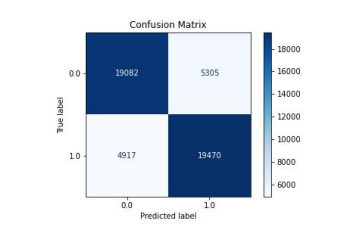

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.893


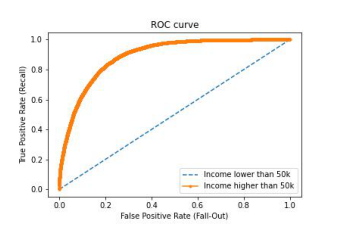


       ***************  Logistic_regression  ***************


Coefficients for feature importance:

('capital-gain', 5.380999714911379)
('hours-per-week', 3.3142928713230937)
('age', 1.9834890059434225)
('marital-status_Married-civ-spouse', 1.6055485935171872)
('occupation_Prof-specialty', 1.5464692588140478)
('capital-loss', 1.4174372568093339)
('occupation_Exec-managerial', 1.3116402820232536)
('relationship_Wife', 1.238753940005919)
('marital-status_Married-AF-spouse', 1.1079156980216056)
('occupation_Tech-support', 0.8434430155699186)
('race_Asian-Pac-Islander', 0.6932602010719632)
('occupation_Protective-serv', 0.6800635648562929)
('workclass_Federal-gov', 0.66393363262961)
('occupation_Sales', 0.6476833111641093)
('race_White', 0.46589642833037476)
('gender_Male', 0.38673868477264683)
('relationship_Not-in-family', 0.3576470192501625)
('workclass_Self-emp-inc', 0.2663953191838348)
('workclass_Private', 0.18677599776412265)
('occupation_Adm-clerical', 0.13317188137727473)
('race

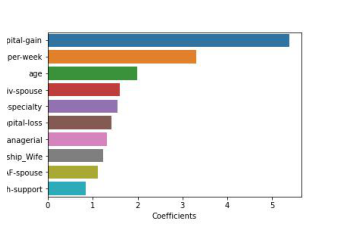

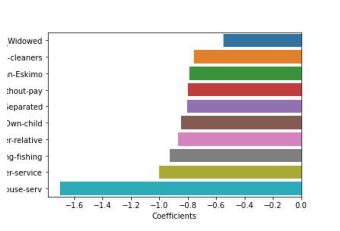


Coefficients for feature importance:

('capital-gain', 5.380999714911379)
('hours-per-week', 3.3142928713230937)
('age', 1.9834890059434225)
('marital-status_Married-civ-spouse', 1.6055485935171872)
('occupation_Prof-specialty', 1.5464692588140478)
('capital-loss', 1.4174372568093339)
('occupation_Exec-managerial', 1.3116402820232536)
('relationship_Wife', 1.238753940005919)
('marital-status_Married-AF-spouse', 1.1079156980216056)
('occupation_Tech-support', 0.8434430155699186)
('race_Asian-Pac-Islander', 0.6932602010719632)
('occupation_Protective-serv', 0.6800635648562929)
('workclass_Federal-gov', 0.66393363262961)
('occupation_Sales', 0.6476833111641093)
('race_White', 0.46589642833037476)
('gender_Male', 0.38673868477264683)
('relationship_Not-in-family', 0.3576470192501625)
('workclass_Self-emp-inc', 0.2663953191838348)
('workclass_Private', 0.18677599776412265)
('occupation_Adm-clerical', 0.13317188137727473)
('race_Black', 0.12120514552745536)
('workclass_Local-gov', 0.1000919

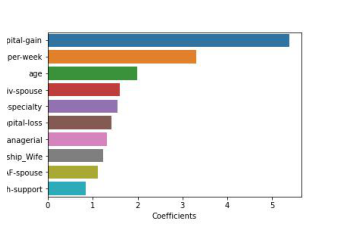

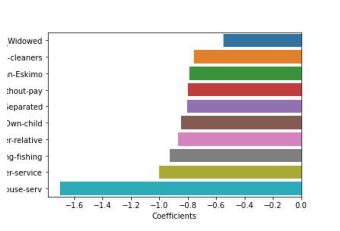

                       Logistic_regression Classification Report

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81     24387
         1.0       0.80      0.84      0.82     24387

    accuracy                           0.81     48774
   macro avg       0.81      0.81      0.81     48774
weighted avg       0.81      0.81      0.81     48774


                        precision score

Scores: [0.79968203 0.7936694  0.79382239 0.81242533 0.80808477 0.79559748
 0.79639781 0.79213266 0.79332822 0.78827113]

Mean of the scores: 0.7973411244002959

Standard deviation of the scores: 0.007097382215670822



                        recall score

Scores: [0.82492825 0.83271833 0.84296843 0.83640836 0.84454471 0.83018868
 0.8342904  0.84214842 0.84829848 0.84870849]

Mean of the scores: 0.8385202551779415

Standard deviation of the scores: 0.007608085102027746



                        f1 score

Scores: [0.81210898 0.81272509 0.81765759 0.82424242 

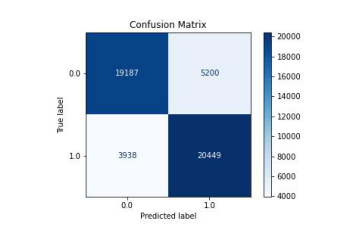

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.894


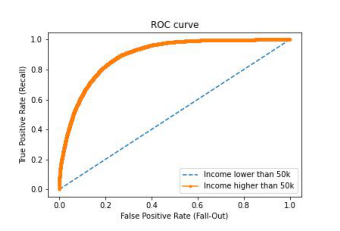


       ***************  Decision_tree  ***************


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.29644895519209746)
('age', 0.17864563844244777)
('hours-per-week', 0.1167814383817314)
('capital-gain', 0.1027583881865451)
('education', 0.09210425235442356)
('occupation_Prof-specialty', 0.02112017155922824)
('occupation_Exec-managerial', 0.020512968655923416)
('capital-loss', 0.02003142560844449)
('occupation_Sales', 0.010880457691968982)
('workclass_Private', 0.009741173039114912)
('occupation_Craft-repair', 0.009453244661163644)
('workclass_Self-emp-not-inc', 0.008531961955157109)
('race_White', 0.00692126690393536)
('workclass_Local-gov', 0.006808380293390486)
('GDP Group', 0.005475581438022211)
('workclass_Self-emp-inc', 0.0053882414807620215)
('gender_Female', 0.00524742617250757)
('occupation_Adm-clerical', 0.005212165393770748)
('occupation_Transport-moving', 0.005167788620893538)
('occupation_Other-service', 0.004662885150541434)
('gender_Ma

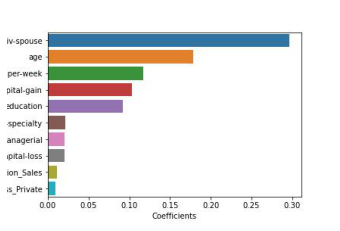

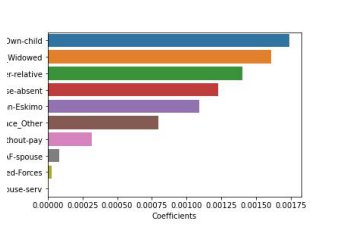


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.29644895519209746)
('age', 0.17864563844244777)
('hours-per-week', 0.1167814383817314)
('capital-gain', 0.1027583881865451)
('education', 0.09210425235442356)
('occupation_Prof-specialty', 0.02112017155922824)
('occupation_Exec-managerial', 0.020512968655923416)
('capital-loss', 0.02003142560844449)
('occupation_Sales', 0.010880457691968982)
('workclass_Private', 0.009741173039114912)
('occupation_Craft-repair', 0.009453244661163644)
('workclass_Self-emp-not-inc', 0.008531961955157109)
('race_White', 0.00692126690393536)
('workclass_Local-gov', 0.006808380293390486)
('GDP Group', 0.005475581438022211)
('workclass_Self-emp-inc', 0.0053882414807620215)
('gender_Female', 0.00524742617250757)
('occupation_Adm-clerical', 0.005212165393770748)
('occupation_Transport-moving', 0.005167788620893538)
('occupation_Other-service', 0.004662885150541434)
('gender_Male', 0.004630511317737039)
('race_Black', 0.0045938351267

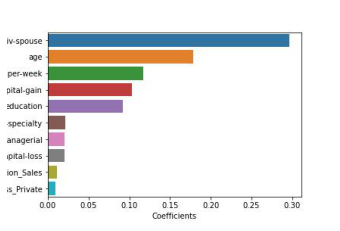

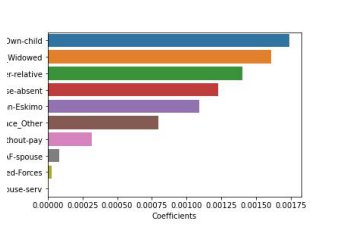

                       Decision_tree Classification Report

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     24387
         1.0       0.85      0.83      0.84     24387

    accuracy                           0.85     48774
   macro avg       0.85      0.85      0.85     48774
weighted avg       0.85      0.85      0.85     48774


                        precision score

Scores: [0.84202294 0.82753327 0.82886905 0.8588137  0.87320109 0.85856269
 0.86003899 0.8595679  0.86312524 0.85483871]

Mean of the scores: 0.8526573574008989

Standard deviation of the scores: 0.014218269710887207



                        recall score

Scores: [0.66215662 0.66297663 0.68511685 0.84296843 0.92083675 0.92124692
 0.90484003 0.91348913 0.91266913 0.91266913]

Mean of the scores: 0.8338969628416546

Standard deviation of the scores: 0.10949557130222612



                        f1 score

Scores: [0.74133578 0.73617118 0.75016835 0.8508173  0.89638

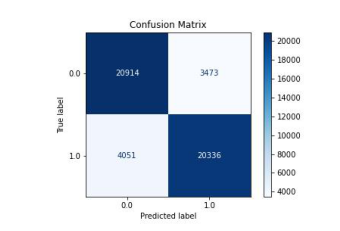

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.999


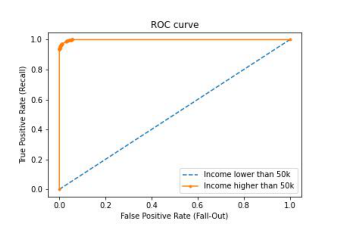


       ***************  Random_forest  ***************


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.30867272576351074)
('relationship_Husband', 0.1403597726951623)
('capital-gain', 0.12768546339295905)
('age', 0.08943416462517753)
('hours-per-week', 0.08928744879305094)
('education', 0.06547336849515989)
('marital-status_Never-married', 0.04880637570462977)
('occupation_Prof-specialty', 0.028437715406676344)
('relationship_Wife', 0.028426868739289356)
('occupation_Exec-managerial', 0.022047380740227097)
('relationship_Not-in-family', 0.007957825413898693)
('occupation_Other-service', 0.006625126008724747)
('relationship_Own-child', 0.005965192730653558)
('capital-loss', 0.005671287354537989)
('marital-status_Divorced', 0.005618922785056964)
('gender_Female', 0.0025163429315699917)
('gender_Male', 0.0023806988282836453)
('relationship_Unmarried', 0.002197273883703824)
('occupation_Farming-fishing', 0.0019178155025980006)
('workclass_Self-emp-not-inc',

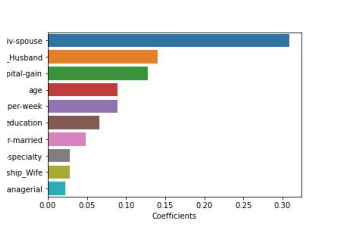

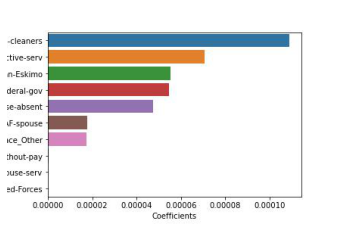


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.30867272576351074)
('relationship_Husband', 0.1403597726951623)
('capital-gain', 0.12768546339295905)
('age', 0.08943416462517753)
('hours-per-week', 0.08928744879305094)
('education', 0.06547336849515989)
('marital-status_Never-married', 0.04880637570462977)
('occupation_Prof-specialty', 0.028437715406676344)
('relationship_Wife', 0.028426868739289356)
('occupation_Exec-managerial', 0.022047380740227097)
('relationship_Not-in-family', 0.007957825413898693)
('occupation_Other-service', 0.006625126008724747)
('relationship_Own-child', 0.005965192730653558)
('capital-loss', 0.005671287354537989)
('marital-status_Divorced', 0.005618922785056964)
('gender_Female', 0.0025163429315699917)
('gender_Male', 0.0023806988282836453)
('relationship_Unmarried', 0.002197273883703824)
('occupation_Farming-fishing', 0.0019178155025980006)
('workclass_Self-emp-not-inc', 0.0016638612176555234)
('occupation_Sales', 0.0013316542

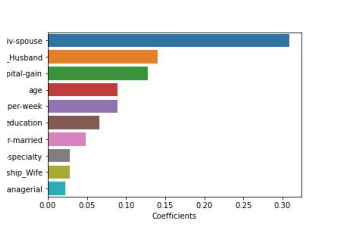

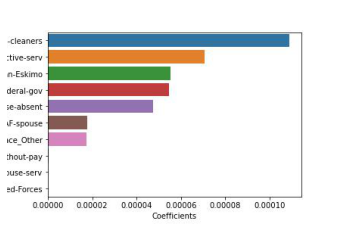

                       Random_forest Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81     24387
         1.0       0.78      0.91      0.84     24387

    accuracy                           0.83     48774
   macro avg       0.84      0.83      0.83     48774
weighted avg       0.84      0.83      0.83     48774


                        precision score

Scores: [0.78031699 0.76576577 0.77598829 0.79579473 0.79364525 0.78122843
 0.7924796  0.78148658 0.77739608 0.78011012]

Mean of the scores: 0.7824211838387536

Standard deviation of the scores: 0.008729860456611354



                        recall score

Scores: [0.86797868 0.87125871 0.86920869 0.91553916 0.93232158 0.92863002
 0.91632486 0.93111931 0.92783928 0.92947929]

Mean of the scores: 0.9089699580342808

Standard deviation of the scores: 0.02641916786300553



                        f1 score

Scores: [0.82181677 0.81511316 0.81995746 0.8514776  0.85741

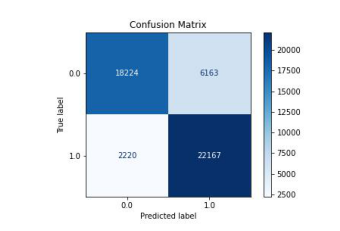

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.921


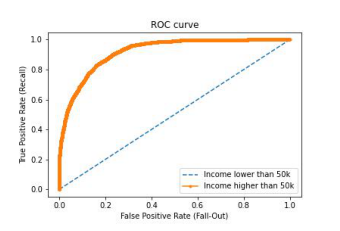


       ***************  Gaussian_naive_bayes  ***************


Coefficients for feature importance:

('relationship_Own-child', 0.0399557141099766)
('occupation_Other-service', 0.021540164841923913)
('capital-gain', 0.017427317833271783)
('marital-status_Never-married', 0.014023865174068128)
('relationship_Not-in-family', 0.011961290851683248)
('relationship_Unmarried', 0.010370279247139846)
('occupation_Handlers-cleaners', 0.009935621437651166)
('marital-status_Married-civ-spouse', 0.009746996350514615)
('relationship_Other-relative', 0.0084512240127937)
('marital-status_Separated', 0.007175954401935414)
('occupation_Farming-fishing', 0.006142616968056713)
('relationship_Husband', 0.006052404969860969)
('marital-status_Widowed', 0.005835076065116618)
('marital-status_Divorced', 0.005269200803706853)
('age', 0.004252265551318279)
('workclass_Self-emp-inc', 0.002899085578381877)
('capital-loss', 0.0028744823061466864)
('occupation_Machine-op-inspct', 0.002673555582892484)
('relationsh

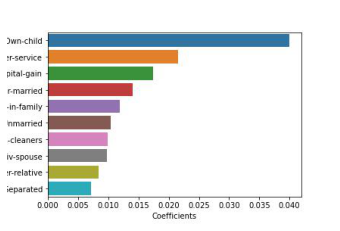

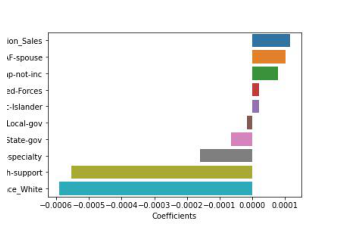


Coefficients for feature importance:

('relationship_Own-child', 0.0399557141099766)
('occupation_Other-service', 0.021540164841923913)
('capital-gain', 0.017427317833271783)
('marital-status_Never-married', 0.014023865174068128)
('relationship_Not-in-family', 0.011961290851683248)
('relationship_Unmarried', 0.010370279247139846)
('occupation_Handlers-cleaners', 0.009935621437651166)
('marital-status_Married-civ-spouse', 0.009746996350514615)
('relationship_Other-relative', 0.0084512240127937)
('marital-status_Separated', 0.007175954401935414)
('occupation_Farming-fishing', 0.006142616968056713)
('relationship_Husband', 0.006052404969860969)
('marital-status_Widowed', 0.005835076065116618)
('marital-status_Divorced', 0.005269200803706853)
('age', 0.004252265551318279)
('workclass_Self-emp-inc', 0.002899085578381877)
('capital-loss', 0.0028744823061466864)
('occupation_Machine-op-inspct', 0.002673555582892484)
('relationship_Wife', 0.0025136343133636664)
('marital-status_Married-spouse

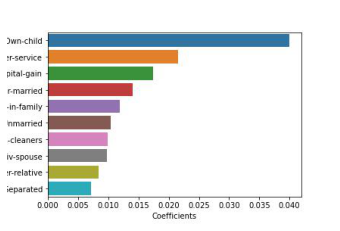

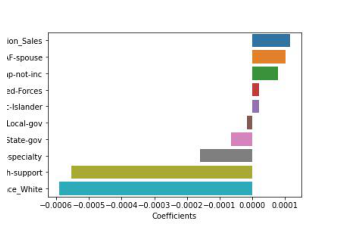

                       Gaussian_naive_bayes Classification Report

              precision    recall  f1-score   support

         0.0       0.87      0.66      0.75     24387
         1.0       0.73      0.90      0.80     24387

    accuracy                           0.78     48774
   macro avg       0.80      0.78      0.78     48774
weighted avg       0.80      0.78      0.78     48774


                        precision score

Scores: [0.72402383 0.71503784 0.7195122  0.73351099 0.73383905 0.73214286
 0.73097463 0.72403561 0.72541927 0.72010427]

Mean of the scores: 0.7258600541365496

Standard deviation of the scores: 0.006207036871763388



                        recall score

Scores: [0.89708897 0.89093891 0.89503895 0.90282903 0.91263331 0.89130435
 0.89827728 0.900369   0.90446904 0.90610906]

Mean of the scores: 0.8999057898700398

Standard deviation of the scores: 0.006470825505870611



                        f1 score

Scores: [0.80131844 0.79335524 0.79773433 0.80941003

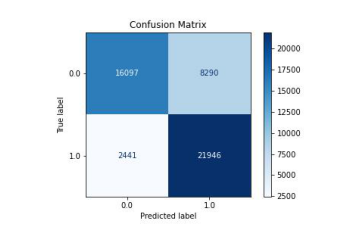

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.867


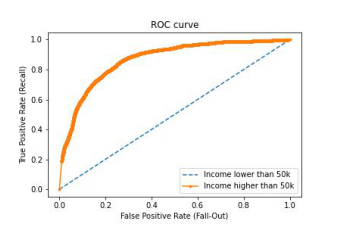


       ***************  K-Nearest_neighbors  ***************

                       K-Nearest_neighbors Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83     24387
         1.0       0.81      0.90      0.85     24387

    accuracy                           0.84     48774
   macro avg       0.84      0.84      0.84     48774
weighted avg       0.84      0.84      0.84     48774


                        precision score

Scores: [0.80308285 0.79225218 0.79827522 0.80876346 0.81042654 0.80506329
 0.8142117  0.81261327 0.81055676 0.79814219]

Mean of the scores: 0.8053387458326998

Standard deviation of the scores: 0.006889098145449706



                        recall score

Scores: [0.85444854 0.85526855 0.87289873 0.89298893 0.91181296 0.91304348
 0.902379   0.91922919 0.91922919 0.91594916]

Mean of the scores: 0.8957247739007332

Standard deviation of the scores: 0.024466166990651125



                        

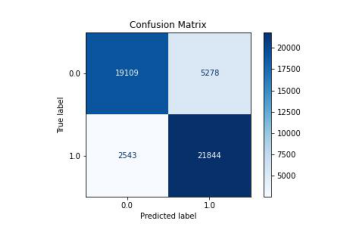

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.964


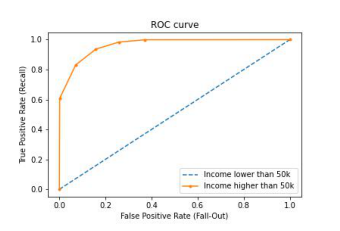


       ***************  Gradient_boosting  ***************


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.4509095252392164)
('capital-gain', 0.1371039379248252)
('age', 0.10734559874738703)
('hours-per-week', 0.09633930120684542)
('education', 0.06529449322220975)
('occupation_Prof-specialty', 0.033223744150301965)
('occupation_Exec-managerial', 0.03023401933470003)
('capital-loss', 0.024244962039988584)
('occupation_Other-service', 0.012180305404248692)
('race_White', 0.0055505153441115455)
('relationship_Not-in-family', 0.005464016512535335)
('occupation_Farming-fishing', 0.00477842850027718)
('occupation_Sales', 0.0044897116265959795)
('workclass_Self-emp-not-inc', 0.003697089737978846)
('occupation_Machine-op-inspct', 0.002780983740243865)
('relationship_Wife', 0.002382572388675312)
('workclass_Federal-gov', 0.0014921734953287167)
('relationship_Husband', 0.001470187895763896)
('GDP Group', 0.0013070199269625783)
('occupation_Tech-support', 0.00130

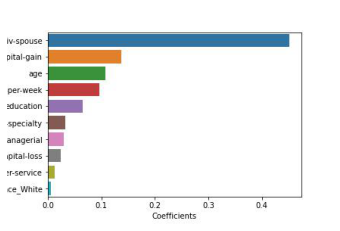

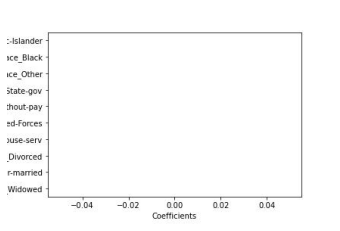


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.4509095252392164)
('capital-gain', 0.1371039379248252)
('age', 0.10734559874738703)
('hours-per-week', 0.09633930120684542)
('education', 0.06529449322220975)
('occupation_Prof-specialty', 0.033223744150301965)
('occupation_Exec-managerial', 0.03023401933470003)
('capital-loss', 0.024244962039988584)
('occupation_Other-service', 0.012180305404248692)
('race_White', 0.0055505153441115455)
('relationship_Not-in-family', 0.005464016512535335)
('occupation_Farming-fishing', 0.00477842850027718)
('occupation_Sales', 0.0044897116265959795)
('workclass_Self-emp-not-inc', 0.003697089737978846)
('occupation_Machine-op-inspct', 0.002780983740243865)
('relationship_Wife', 0.002382572388675312)
('workclass_Federal-gov', 0.0014921734953287167)
('relationship_Husband', 0.001470187895763896)
('GDP Group', 0.0013070199269625783)
('occupation_Tech-support', 0.0013061388856891272)
('gender_Female', 0.0012680591131693712)
('ge

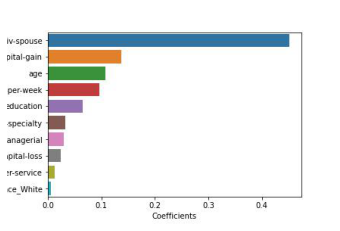

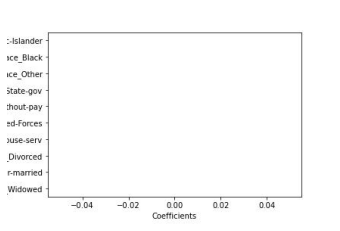

                       Gradient_boosting Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85     24387
         1.0       0.83      0.89      0.86     24387

    accuracy                           0.86     48774
   macro avg       0.86      0.86      0.86     48774
weighted avg       0.86      0.86      0.86     48774


                        precision score

Scores: [0.81833128 0.81487536 0.81626872 0.84944166 0.84917665 0.83302481
 0.83599851 0.83265608 0.82707041 0.82619739]

Mean of the scores: 0.8303040857820984

Standard deviation of the scores: 0.01171959074057235



                        recall score

Scores: [0.81631816 0.81754818 0.82697827 0.90446904 0.93068089 0.92288761
 0.92206727 0.92414924 0.92947929 0.93357934]

Mean of the scores: 0.8928157292237401

Standard deviation of the scores: 0.04813405400378585



                        f1 score

Scores: [0.81732348 0.81620958 0.82158859 0.87609214 0.88

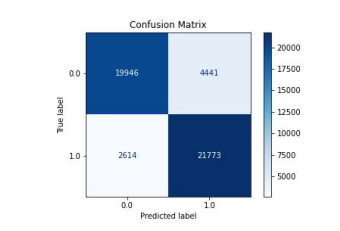

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.941


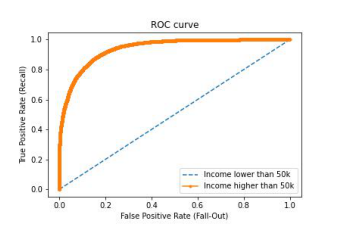


       ***************  Linear_discriminant_analysis  ***************


Coefficients for feature importance:

('capital-gain', 3.7474360252275534)
('hours-per-week', 2.8607699972367)
('age', 1.819954413596109)
('relationship_Wife', 1.696742528393793)
('capital-loss', 1.461275191133111)
('occupation_Prof-specialty', 1.146331329250227)
('occupation_Exec-managerial', 0.9996034699682312)
('marital-status_Married-civ-spouse', 0.8071665048956956)
('relationship_Husband', 0.6768066741205636)
('workclass_Federal-gov', 0.6497130130572176)
('occupation_Tech-support', 0.4278838362015788)
('marital-status_Married-AF-spouse', 0.3945696283888358)
('gender_Male', 0.35173945831240866)
('occupation_Protective-serv', 0.302755971834143)
('occupation_Sales', 0.2869778891712625)
('race_Asian-Pac-Islander', 0.24926865341235405)
('workclass_Self-emp-inc', 0.16044873676670796)
('race_White', 0.14885190148111271)
('workclass_Private', 0.0649988842110839)
('education', 0.03472769046680868)
('workclass_Local-go

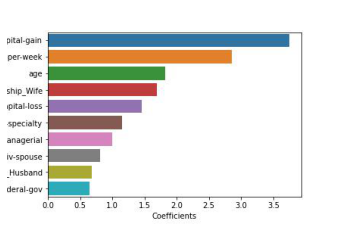

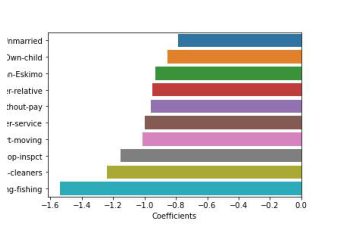


Coefficients for feature importance:

('capital-gain', 3.7474360252275534)
('hours-per-week', 2.8607699972367)
('age', 1.819954413596109)
('relationship_Wife', 1.696742528393793)
('capital-loss', 1.461275191133111)
('occupation_Prof-specialty', 1.146331329250227)
('occupation_Exec-managerial', 0.9996034699682312)
('marital-status_Married-civ-spouse', 0.8071665048956956)
('relationship_Husband', 0.6768066741205636)
('workclass_Federal-gov', 0.6497130130572176)
('occupation_Tech-support', 0.4278838362015788)
('marital-status_Married-AF-spouse', 0.3945696283888358)
('gender_Male', 0.35173945831240866)
('occupation_Protective-serv', 0.302755971834143)
('occupation_Sales', 0.2869778891712625)
('race_Asian-Pac-Islander', 0.24926865341235405)
('workclass_Self-emp-inc', 0.16044873676670796)
('race_White', 0.14885190148111271)
('workclass_Private', 0.0649988842110839)
('education', 0.03472769046680868)
('workclass_Local-gov', 0.0015650294123947207)
('race_Black', -0.18222758888080326)
('workcl

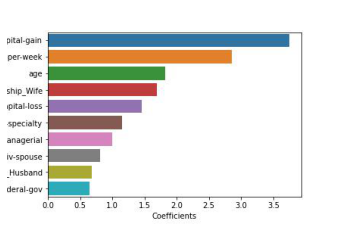

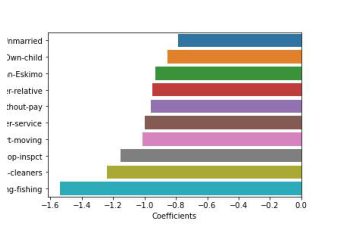

                       Linear_discriminant_analysis Classification Report

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80     24387
         1.0       0.78      0.85      0.81     24387

    accuracy                           0.81     48774
   macro avg       0.81      0.81      0.81     48774
weighted avg       0.81      0.81      0.81     48774


                        precision score

Scores: [0.78908951 0.77138588 0.77916195 0.79768786 0.79122542 0.78130912
 0.78216319 0.77715566 0.77769461 0.77777778]

Mean of the scores: 0.78246509669636

Standard deviation of the scores: 0.0074857503024741735



                        recall score

Scores: [0.84214842 0.84665847 0.84624846 0.84870849 0.85808039 0.84700574
 0.84536505 0.85362854 0.85198852 0.85813858]

Mean of the scores: 0.8497970664694343

Standard deviation of the scores: 0.00516953979005945



                        f1 score

Scores: [0.81475605 0.80727131 0.81132075 0.82

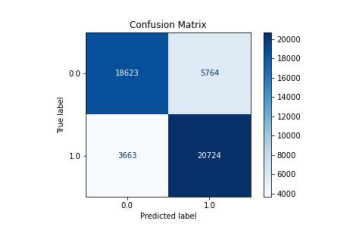

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.890


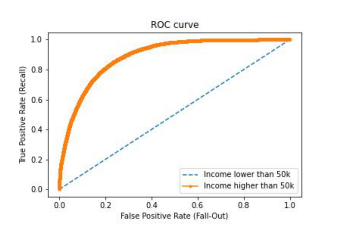


       ***************  Bagging  ***************


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.2934930638966455)
('age', 0.18545067700138412)
('hours-per-week', 0.11478547423334189)
('capital-gain', 0.09577417807132566)
('education', 0.08987168865986037)
('occupation_Prof-specialty', 0.02030386664771933)
('occupation_Exec-managerial', 0.01957698039902297)
('capital-loss', 0.019134594617497322)
('workclass_Private', 0.012002188470154964)
('occupation_Sales', 0.011208002575950823)
('occupation_Craft-repair', 0.01009106167421702)
('workclass_Self-emp-not-inc', 0.008632569051978197)
('race_White', 0.0068951150503533815)
('workclass_Local-gov', 0.00671859853152233)
('occupation_Other-service', 0.0062751542207035394)
('workclass_Self-emp-inc', 0.006232309276953873)
('GDP Group', 0.005625722197313674)
('occupation_Adm-clerical', 0.005456593658976304)
('gender_Male', 0.005372786788653023)
('workclass_State-gov', 0.005299558636886145)
('race_Black', 0.00521897

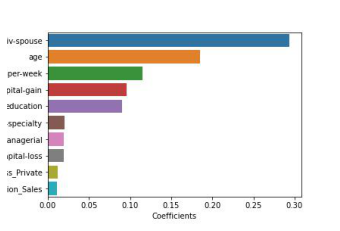

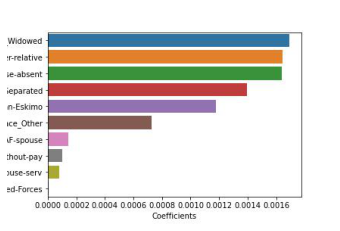


Coefficients for feature importance:

('marital-status_Married-civ-spouse', 0.2934930638966455)
('age', 0.18545067700138412)
('hours-per-week', 0.11478547423334189)
('capital-gain', 0.09577417807132566)
('education', 0.08987168865986037)
('occupation_Prof-specialty', 0.02030386664771933)
('occupation_Exec-managerial', 0.01957698039902297)
('capital-loss', 0.019134594617497322)
('workclass_Private', 0.012002188470154964)
('occupation_Sales', 0.011208002575950823)
('occupation_Craft-repair', 0.01009106167421702)
('workclass_Self-emp-not-inc', 0.008632569051978197)
('race_White', 0.0068951150503533815)
('workclass_Local-gov', 0.00671859853152233)
('occupation_Other-service', 0.0062751542207035394)
('workclass_Self-emp-inc', 0.006232309276953873)
('GDP Group', 0.005625722197313674)
('occupation_Adm-clerical', 0.005456593658976304)
('gender_Male', 0.005372786788653023)
('workclass_State-gov', 0.005299558636886145)
('race_Black', 0.00521897088199957)
('relationship_Not-in-family', 0.0051831

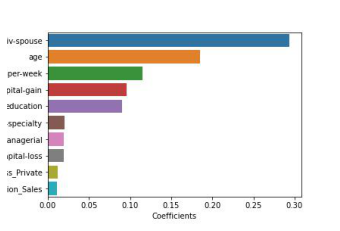

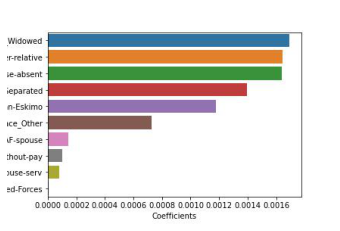

                       Bagging Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     24387
         1.0       0.88      0.86      0.87     24387

    accuracy                           0.87     48774
   macro avg       0.87      0.87      0.87     48774
weighted avg       0.87      0.87      0.87     48774


                        precision score

Scores: [0.86564805 0.8510101  0.86919621 0.882402   0.89449004 0.87253414
 0.87770062 0.87619412 0.88362235 0.87447539]

Mean of the scores: 0.8747273011189277

Standard deviation of the scores: 0.011045295542475124



                        recall score

Scores: [0.67363674 0.69085691 0.71381714 0.86756868 0.93888433 0.94339623
 0.93314192 0.9401394  0.9401394  0.9397294 ]

Mean of the scores: 0.8581310136317114

Standard deviation of the scores: 0.11066221897561968



                        f1 score

Scores: [0.75766659 0.76261598 0.78388113 0.87492247 0.91614969 0.

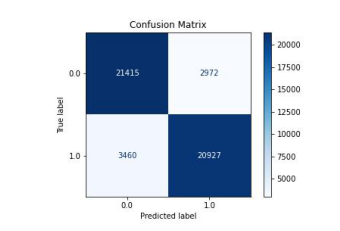

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.997


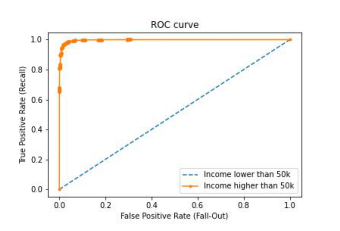


       ***************  Neural_network  ***************

                       Neural_network Classification Report

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     24387
         1.0       0.81      0.91      0.86     24387

    accuracy                           0.85     48774
   macro avg       0.85      0.85      0.85     48774
weighted avg       0.85      0.85      0.85     48774


                        precision score

Scores: [0.80557707 0.77729573 0.79826218 0.80819964 0.8564222  0.80765217
 0.79828473 0.82303164 0.85167464 0.803125  ]

Mean of the scores: 0.8129525019506751

Standard deviation of the scores: 0.023226324100637036



                        recall score

Scores: [0.85280853 0.88150882 0.86633866 0.92947929 0.90525021 0.95242002
 0.95447088 0.91717917 0.87576876 0.94833948]

Mean of the scores: 0.9083563813488833

Standard deviation of the scores: 0.035824941386269016



                        f1 score



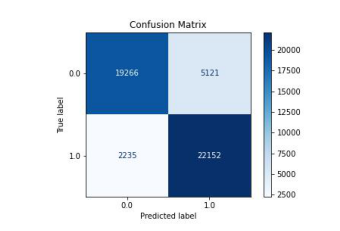

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.946


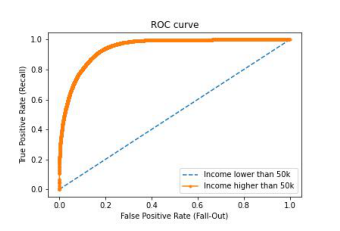


       ***************  AdaBoost  ***************


Coefficients for feature importance:

('capital-gain', 0.2)
('hours-per-week', 0.2)
('age', 0.1)
('education', 0.08)
('capital-loss', 0.04)
('race_White', 0.02)
('gender_Male', 0.02)
('workclass_Federal-gov', 0.02)
('workclass_Private', 0.02)
('workclass_Self-emp-inc', 0.02)
('occupation_Exec-managerial', 0.02)
('occupation_Farming-fishing', 0.02)
('occupation_Machine-op-inspct', 0.02)
('occupation_Other-service', 0.02)
('occupation_Prof-specialty', 0.02)
('occupation_Protective-serv', 0.02)
('occupation_Sales', 0.02)
('occupation_Tech-support', 0.02)
('marital-status_Married-civ-spouse', 0.02)
('relationship_Husband', 0.02)
('relationship_Other-relative', 0.02)
('relationship_Own-child', 0.02)
('relationship_Unmarried', 0.02)
('relationship_Wife', 0.02)
('GDP Group', 0.0)
('race_Amer-Indian-Eskimo', 0.0)
('race_Asian-Pac-Islander', 0.0)
('race_Black', 0.0)
('race_Other', 0.0)
('gender_Female', 0.0)
('workclass_Local-gov', 0.0)
('wor

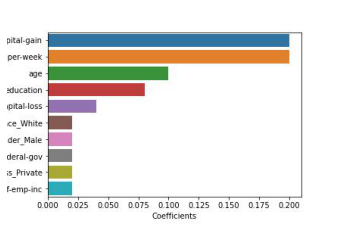

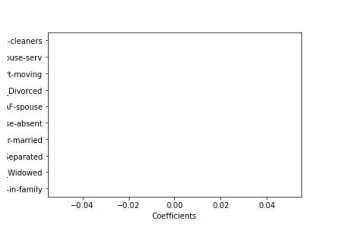


Coefficients for feature importance:

('capital-gain', 0.2)
('hours-per-week', 0.2)
('age', 0.1)
('education', 0.08)
('capital-loss', 0.04)
('race_White', 0.02)
('gender_Male', 0.02)
('workclass_Federal-gov', 0.02)
('workclass_Private', 0.02)
('workclass_Self-emp-inc', 0.02)
('occupation_Exec-managerial', 0.02)
('occupation_Farming-fishing', 0.02)
('occupation_Machine-op-inspct', 0.02)
('occupation_Other-service', 0.02)
('occupation_Prof-specialty', 0.02)
('occupation_Protective-serv', 0.02)
('occupation_Sales', 0.02)
('occupation_Tech-support', 0.02)
('marital-status_Married-civ-spouse', 0.02)
('relationship_Husband', 0.02)
('relationship_Other-relative', 0.02)
('relationship_Own-child', 0.02)
('relationship_Unmarried', 0.02)
('relationship_Wife', 0.02)
('GDP Group', 0.0)
('race_Amer-Indian-Eskimo', 0.0)
('race_Asian-Pac-Islander', 0.0)
('race_Black', 0.0)
('race_Other', 0.0)
('gender_Female', 0.0)
('workclass_Local-gov', 0.0)
('workclass_Self-emp-not-inc', 0.0)
('workclass_State-gov

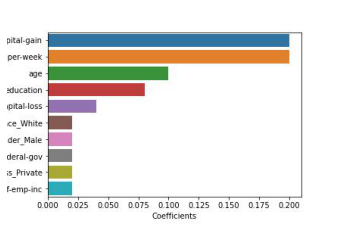

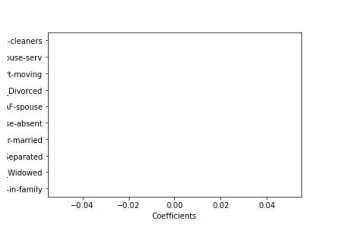

                       AdaBoost Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84     24387
         1.0       0.83      0.86      0.85     24387

    accuracy                           0.84     48774
   macro avg       0.84      0.84      0.84     48774
weighted avg       0.84      0.84      0.84     48774


                        precision score

Scores: [0.82937182 0.81866776 0.81818182 0.84590818 0.84375    0.83339687
 0.83237658 0.83192956 0.82207207 0.82704762]

Mean of the scores: 0.8302702281080225

Standard deviation of the scores: 0.0089574821242382



                        recall score

Scores: [0.80114801 0.81631816 0.80811808 0.86879869 0.88597211 0.89663659
 0.89212469 0.89093891 0.89790898 0.8901189 ]

Mean of the scores: 0.8648083121520305

Standard deviation of the scores: 0.037762219207757755



                        f1 score

Scores: [0.81501564 0.81749127 0.81311881 0.85720065 0.86434574 0.

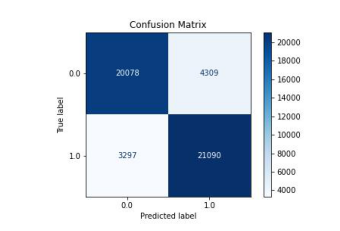

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.927


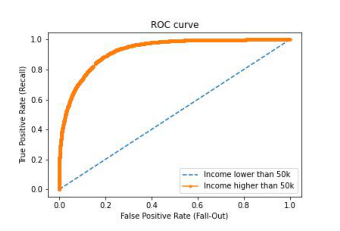


       ***************  Extra_trees  ***************


Coefficients for feature importance:

('age', 0.19807971847329545)
('hours-per-week', 0.1141218275164441)
('marital-status_Married-civ-spouse', 0.09303784435994748)
('education', 0.08254334480723229)
('capital-gain', 0.06492117574517174)
('relationship_Husband', 0.060680187288337455)
('marital-status_Never-married', 0.048856963572655544)
('occupation_Exec-managerial', 0.026402165540856583)
('occupation_Prof-specialty', 0.02604981168008962)
('occupation_Other-service', 0.02161327054402702)
('relationship_Own-child', 0.020405734933427167)
('relationship_Not-in-family', 0.019385186227910484)
('relationship_Wife', 0.019091798801938793)
('capital-loss', 0.018890317129329467)
('gender_Female', 0.01808936693646619)
('gender_Male', 0.014584639662536267)
('workclass_Private', 0.01093152233055209)
('marital-status_Divorced', 0.010344373697572311)
('occupation_Craft-repair', 0.008466113510669669)
('occupation_Machine-op-inspct', 0.0083891994

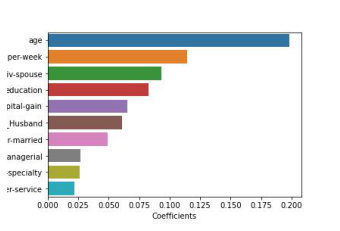

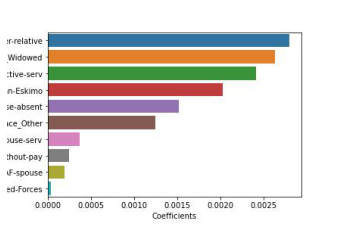


Coefficients for feature importance:

('age', 0.19807971847329545)
('hours-per-week', 0.1141218275164441)
('marital-status_Married-civ-spouse', 0.09303784435994748)
('education', 0.08254334480723229)
('capital-gain', 0.06492117574517174)
('relationship_Husband', 0.060680187288337455)
('marital-status_Never-married', 0.048856963572655544)
('occupation_Exec-managerial', 0.026402165540856583)
('occupation_Prof-specialty', 0.02604981168008962)
('occupation_Other-service', 0.02161327054402702)
('relationship_Own-child', 0.020405734933427167)
('relationship_Not-in-family', 0.019385186227910484)
('relationship_Wife', 0.019091798801938793)
('capital-loss', 0.018890317129329467)
('gender_Female', 0.01808936693646619)
('gender_Male', 0.014584639662536267)
('workclass_Private', 0.01093152233055209)
('marital-status_Divorced', 0.010344373697572311)
('occupation_Craft-repair', 0.008466113510669669)
('occupation_Machine-op-inspct', 0.008389199406574033)
('workclass_Self-emp-not-inc', 0.008348171590

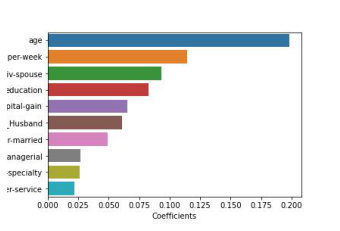

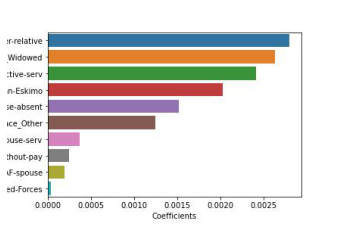

                       Extra_trees Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     24387
         1.0       0.87      0.89      0.88     24387

    accuracy                           0.88     48774
   macro avg       0.88      0.88      0.88     48774
weighted avg       0.88      0.88      0.88     48774


                        precision score

Scores: [0.85934579 0.85655172 0.86285971 0.87754288 0.88535276 0.86731634
 0.88082506 0.87627696 0.88028701 0.87034949]

Mean of the scores: 0.8716707730295419

Standard deviation of the scores: 0.009379595908192309



                        recall score

Scores: [0.75399754 0.76383764 0.78679787 0.90200902 0.94708778 0.94913864
 0.94585726 0.9495695  0.95571956 0.9495695 ]

Mean of the scores: 0.8903584290149711

Standard deviation of the scores: 0.08154738417556448



                        f1 score

Scores: [0.80323215 0.80754226 0.82307527 0.88960776 0.9151803

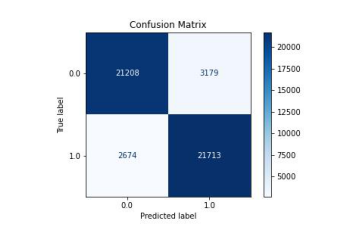

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.999


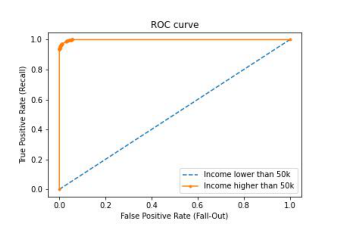

In [192]:
for model_name,model in model_dict.items():
    evaluate_model(model,model_name,X_train_copy_prep,y_train_copy_prep)

In [193]:
create_summary_table(summary_data)

## 5.3. Analyze the most significant variables for each algorithm.
### (For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds)

Done in quick models comparison

## 5.4 Analyze the types of errors the models make.

### 5.4.1 While keeping all the features

We will focus on 5 models: Random forest, Bagging, Gradient boosting, KNN, and Neural network.

* For Random forest: Looking at the confusion matrix, the estimator is making more errors on False Positive(5852 times), meaning that we are predicting an income higher than 50K but the income is actually lower than 50K. False Negative is low at 2377 times.
* For KNN: Looking at the confusion matrix, the estimator is making also errors on False Positive but a bit less than the Random forest(5281 times). False negative is low as well at 2607 times
* For Gradient Boosting: Looking at the confusion matrix, the estimator is making some errors on False Positive but way less than the Random forest or KNN(4423 times). False negative is relatively low at 2499 times.
* For Bagging: False positive is low compare to the other models at 2948 times. False negative is high at 3327 times.
* For neural network: False positive is high at 4385 times and False negative is low at 2912 times.


Conclusion: It seems that in general, the model are making more errors on False Positive than on False Negative except fir the Bagging model.

Solution to this issue would be for example to gather more data that represent people with an income more than 50K. The root of this issue would be the fact that we have balance the data set using the SMOTE method(by duplicating the minority class)

### 5.4.2 While dropping native-country and occupation

## 5.5 Perform a quick round of feature selection and engineering.

Dropping native-country and occupation to see if this improves the performace of the models, which does not improv

In [ ]:
# TODO: add the feature importance visualization
# TODO: implement the same drop methodology use in FeatureToDrop class in DropMaritalOrRelationship class
# TODO: create a save the summary table data frame mechanism
# TODO: using the bottom 10 features, toggle to drop occupation, native country, workclass, (marital and relationship) and compare the result in the summary table. Automate this with a loop/combination